<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Павел! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Дмитрий привет! :)

</div>

# Проект PoC: Поиск изображений по описанию

## Постановка задачи

**Компания**: фотохостинг «Со Смыслом» (With Sense)

**📌 Цель проекта**<br>
Разработка демонстрационной версии поиска изображений по текстовому запросу.  
Пользователь вводит описание сцены — сервис находит подходящие фотографии на основе текстово-визуального соответствия.

**🔐 Юридические ограничения**<br>
В странах присутствия сервиса действуют законы, запрещающие показывать изображения, связанные с детьми младше 16 лет, без разрешения родителей.  
В рабочем сервисе при таких нарушениях выводится сообщение:

> **This image is unavailable in your country in compliance with local laws.**

В рамках PoC функционал фильтрации отсутствует, поэтому:
- Перед обучением необходимо **очистить датасет** от потенциально проблемного контента;
- Во время тестов — при наличии "вредного" текста в запросе — **выводить дисклеймер вместо результата**.



**🧾 Описание данных**

**📁 Обучающая выборка**
**`train_dataset.csv`** — описание изображений:
- `image`: имя файла изображения  
- `query_id`: ID описания (`<image_name>#<index>`)  
- `query_text`: текст описания  

Каждое изображение может иметь до 5 текстов.  
**`train_images/`** — изображения для обучения.



**🧠 Аннотации соответствия**
**`CrowdAnnotations.tsv`** — оценки соответствия текста и изображения по мнению пользователей:
- имя изображения  
- query_id  
- доля положительных отзывов  
- количество "да"  
- количество "нет"

**`ExpertAnnotations.tsv`** — оценки соответствия от экспертов:
- имя изображения  
- query_id  
- оценки 3 экспертов по шкале от 1 до 4



**🧪 Тестовая выборка**
**`test_queries.csv`** — текстовые запросы:
- query_id  
- query_text  
- релевантное изображение  

**`test_images/`** — изображения для тестирования



**🛠️ Условия реализации**
- Для построения модели использовать только **один фреймворк**: PyTorch или Keras  
- На выходе модель должна выдавать **оценку от 0 до 1**, показывающую, насколько хорошо изображение соответствует запросу

**📋 План работы**
- Загрузка данных и проведение исследовательского анализа данных (EDA)
- Подготовка данных к обучению модели
- Обучение модели на обучающей выборке
- Тестирование модели и демонстрация примеров её работы
- Общий вывод по результатам работы и оценка перспективы интеграции в продукт

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Очень круто и наглядно </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

## Импорт библиотек и настройка тетрадки

In [129]:
# 1. Стандартные библиотеки
import os
import time
import random

# 2. Научные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 3. Визуализация
from PIL import Image
from IPython.display import display

# 4. Torch & Vision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet50, ResNet50_Weights

# 5. Transformers (HuggingFace)
from transformers import BertTokenizer, BertModel

# 6. Scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    GroupShuffleSplit,
    RandomizedSearchCV,
    ParameterGrid
)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import (
    mean_squared_error, r2_score
)
from sklearn.linear_model import (
    Ridge, Lasso
)
from sklearn.ensemble import (
    RandomForestRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

# 9. Прочее
from tqdm.notebook import tqdm  # для Jupyter

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

## Загрузка данных

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Единственный момент, касающийся загрузки данных - я бы добавил путь к папке с данными в константу и все пути к датасетам и изображениям собрал с помощью этого пути.
    
Но и текущая подача неплоха.    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
У меня все датасеты лежат в корневой папке. Только изображения для обучения и теста в отдельных папках. Поэтому я и не стал заводить переменную.

</div>

In [130]:
train = pd.read_csv('train_dataset.csv')

In [131]:
test = pd.read_csv('test_queries.csv', sep='|')

In [132]:
crowd_annot = pd.read_csv('CrowdAnnotations.tsv', sep='\t', header=None, names=['image', 'query_id', 'relevance_ratio', 'crowd_votes_match', 'crowd_votes_mismatch'])

In [133]:
expert_annot = pd.read_csv('ExpertAnnotations.tsv', sep='\t', header=None, names=['image', 'query_id', 'expert_1', 'expert_2', 'expert_3'])

In [134]:
display(train.info(), train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


None

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

In [135]:
display(test.info(), test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   query_id    500 non-null    object
 2   query_text  500 non-null    object
 3   image       500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


None

Unnamed: 0                     query_id  \
0           0  1177994172_10d143cb8d.jpg#0   
1           1  1177994172_10d143cb8d.jpg#1   
2           2  1177994172_10d143cb8d.jpg#2   
3           3  1177994172_10d143cb8d.jpg#3   
4           4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg

In [136]:
display(crowd_annot.info(), crowd_annot.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   image                 47830 non-null  object 
 1   query_id              47830 non-null  object 
 2   relevance_ratio       47830 non-null  float64
 3   crowd_votes_match     47830 non-null  int64  
 4   crowd_votes_mismatch  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


None

image                     query_id  relevance_ratio  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2              1.0   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2              0.0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2              0.0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2              0.0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2              0.0   

   crowd_votes_match  crowd_votes_mismatch  
0                  3                     0  
1                  0                     3  
2                  0                     3  
3                  0                     3  
4                  0                     3

In [137]:
display(expert_annot.info(), expert_annot.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   expert_1  5822 non-null   int64 
 3   expert_2  5822 non-null   int64 
 4   expert_3  5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


None

image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2         1         1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2         1         1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2         1         1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2         1         2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2         1         1   

   expert_3  
0         1  
1         2  
2         2  
3         2  
4         2

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Есть загрузка и предварительное знакомствос датасетом. </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

## Исследовательский анализ данных (EDA)

### Отмечаю сообщения про детей

In [138]:
# Шаг 1: найдём строки с "детскими" словами
keywords_mask = train['query_text'].str.contains('child|kid|baby|babies|boy|girl', case=False, na=False)

# Шаг 2: извлечём имена изображений из query_id до символа '#'
images_with_kids = train.loc[keywords_mask, 'query_id'].str.extract(r'^(.*)#')[0].unique()

# Шаг 3: создаём новый столбец 'kids', где True для всех строк с этими изображениями
train['kids'] = train['image'].isin(images_with_kids)

In [139]:
train.sample(3)

image                     query_id  \
3186   624742559_ff467d8ebc.jpg   463978865_c87c6ca84c.jpg#2   
845   1258913059_07c613f7ff.jpg  3725202807_12fbfdd207.jpg#2   
391    468102269_135938e209.jpg   166507476_9be5b9852a.jpg#2   

                                             query_text   kids  
3186  A man with dreadlocks and a backpack walks dow...   True  
845   A man and a woman are walking past a car with ...  False  
391                              Two lizards fighting .  False

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

### Аггрегирую оценки экспертов и крауда

**Эксперты**

In [140]:
# Функция для подсчета итоговой оценки
def get_majority_vote(row):
    votes = [row['expert_1'], row['expert_2'], row['expert_3']]
    vote_counts = pd.Series(votes).value_counts()
    
    # Если все оценки разные (встречаются по одному разу), вернуть None
    if vote_counts.iloc[0] == 1:
        return None
    else:
        return vote_counts.idxmax()

In [141]:
# Применяем функцию к строкам и создаём колонку с финальной оценкой
expert_annot['experts_score'] = expert_annot.apply(get_majority_vote, axis=1)

In [142]:
# Удаляем строки, где все оценки разные (т.е. final_score = None)
expert_annot_cleaned = expert_annot.dropna(subset=['experts_score'])

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

In [143]:
# Масштабируем по максимальной оценке минус 1, чтобы для полного несоотвествия признак был равен нулю
expert_annot_cleaned = expert_annot_cleaned.copy()
expert_annot_cleaned['experts_score'] = expert_annot_cleaned['experts_score'].apply(lambda x: (x-1)/3)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

In [144]:
# Результат
expert_annot_cleaned.head()

image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2         1         1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2         1         1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2         1         1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2         1         2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2         1         1   

   expert_3  experts_score  
0         1       0.000000  
1         2       0.000000  
2         2       0.000000  
3         2       0.333333  
4         2       0.000000

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

**Крауд**

In [145]:
crowd_annot.sample(3)

image                     query_id  \
16549  2677656448_6b7e7702af.jpg    96420612_feb18fc6c6.jpg#2   
10144  2374652725_32f90fa15c.jpg   315880837_90db309bab.jpg#2   
6505   2128119486_4407061c40.jpg  2479652566_8f9fac8af5.jpg#2   

       relevance_ratio  crowd_votes_match  crowd_votes_mismatch  
16549              0.0                  0                     3  
10144              0.0                  0                     3  
6505               0.0                  0                     3

In [146]:
crowd_annot.dropna(inplace=True)

**Создаю таргет**

Для тагрета беру - (оценку экспертов - большинство)*0.6+(крауд relevance_ratio)*0.4

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мне кажется это лишня операция, ведь внутри merge можно просто передать список колонок и объединение будет происходить с учетом двух колонок.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Исправил, см ниже.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мне кажется это лишня операция, ведь внутри merge можно просто передать список колонок и объединение будет происходить с учетом двух колонок.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Исправил, см ниже.

</div>

In [147]:
# Объединение массивов
train_merged = train.merge(
    expert_annot_cleaned[['image', 'query_id', 'experts_score']],  # Указываем нужные колонки
    on=['image', 'query_id'],  # Объединение по двум колонкам
    how='left'
).merge(
    crowd_annot[['image', 'query_id', 'relevance_ratio']],  # Указываем нужные колонки
    on=['image', 'query_id'],  # Объединение по двум колонкам
    how='left'
)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! Мне понравилась идея с объединением через outer. По поводу качества разметки краудсорсерами - остутствие шкалы компенсируется (отчасти) процентом голосов за совпадение. Т.е. это уже не бинарный показатель.
</div>

In [148]:
# Функция для расчёта target с учетом условий
def calculate_target(row):
    score = row['experts_score']
    ratio = row['relevance_ratio']
    
    if pd.isna(score) and pd.isna(ratio):
        return None
    return (0 if pd.isna(score) else score) * 0.6 + (0 if pd.isna(ratio) else ratio) * 0.4

In [149]:
# Применяем функцию построчно
train_merged['target'] = train_merged.apply(calculate_target, axis=1)

In [150]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image            5822 non-null   object 
 1   query_id         5822 non-null   object 
 2   query_text       5822 non-null   object 
 3   kids             5822 non-null   bool   
 4   experts_score    5696 non-null   float64
 5   relevance_ratio  2329 non-null   float64
 6   target           5767 non-null   float64
dtypes: bool(1), float64(3), object(3)
memory usage: 278.7+ KB


In [151]:
# Убираем лишние столбцы
train_merged.drop(columns=['experts_score', 'relevance_ratio'], inplace=True)

In [152]:
# Шаг 1: Найдём изображения с детьми
images_with_kids_and_high_target = train_merged.query('kids == True')['image'].unique()

# Шаг 2: Удалим все строки с такими изображениями, а также все строки с kids == True
filtered_df = train_merged[
    (train_merged['kids'] == False) &
    (~train_merged['image'].isin(images_with_kids_and_high_target)) &
    (~train_merged['target'].isna())
].copy()

In [153]:
filtered_df.drop(columns=['kids'], inplace=True)

In [154]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4064 entries, 0 to 5820
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       4064 non-null   object 
 1   query_id    4064 non-null   object 
 2   query_text  4064 non-null   object 
 3   target      4064 non-null   float64
dtypes: float64(1), object(3)
memory usage: 158.8+ KB


In [155]:
filtered_df.head(3)

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  target  
0  A young child is wearing blue goggles and sitt...     0.0  
1  A young child is wearing blue goggles and sitt...     0.0  
4  A young child is wearing blue goggles and sitt...     0.0

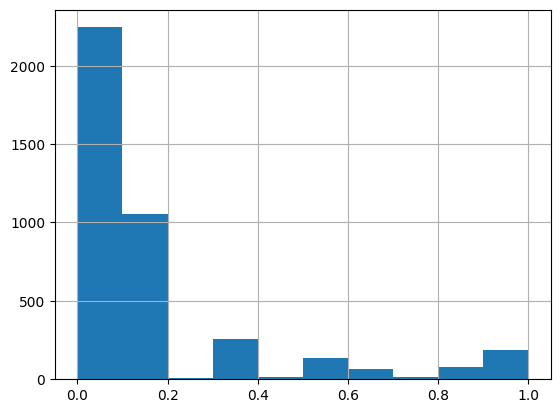

In [156]:
filtered_df['target'].hist();

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, все коротко и по делу. Получен итоговый датафрейм признаки/таргет, проведена очистка от детских фото. Можем приступать к машинному обучению. </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

**Вывод:** 80% пар картинка-запрос имеют низкий таргет по релевантности (до 0.2).

### Печать фотографий тренировочного датасета

In [157]:
def photos_print(df, path_2):
    # Группируем все query_text по каждому изображению
    grouped = df.groupby('image')['query_text'].apply(list).reset_index()

    # Оставим только первые 15 изображений для вывода
    sample = grouped.head(15)

    # Размер вывода
    fig, axes = plt.subplots(len(sample), 1, figsize=(10, len(sample) * 3))

    # Если только 1 изображение — обернём в список
    if len(sample) == 1:
        axes = [axes]

    for i, row in enumerate(sample.itertuples()):
        image_path = os.path.join(path_2, row.image)
        try:
            img = Image.open(image_path).resize((224, 224))
            axes[i].imshow(img)
            axes[i].axis('off')
            # Объединяем все запросы в одну строку
            query_texts = "\n• " + "\n• ".join(row.query_text)
            axes[i].set_title(f"Имя файла: {row.image}\nЗапросы:{query_texts}", fontsize=10)
        except Exception as e:
            print(f"Ошибка при открытии изображения {row.image}: {e}")

    plt.tight_layout()
    plt.show()


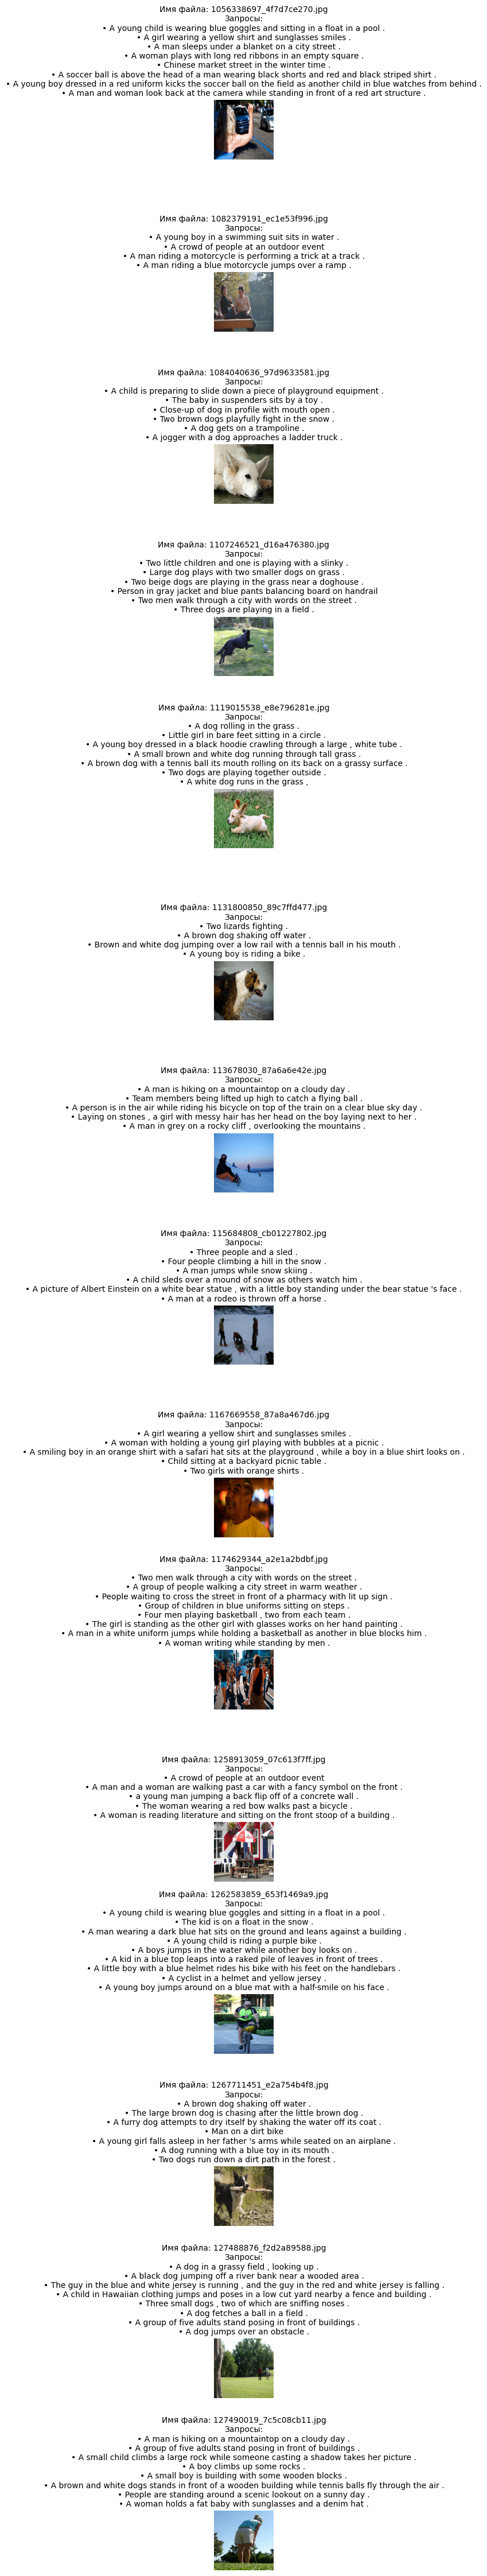

In [158]:
photos_print(filtered_df, 'train_images/')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

## Формирую текстовые эмбеддинги (BERT)

In [159]:
def get_bert_text_embeddings(texts, batch_size=64, max_length=512, device=None):
    """
    Вычисляет BERT-эмбеддинги по текстовым строкам.

    Parameters:
        texts (pd.Series or list or str): тексты
        batch_size (int): размер батча
        max_length (int): максимум токенов
        device (str): 'cuda' или 'cpu' (определяется автоматически, если None)

    Returns:
        pd.DataFrame: эмбеддинги + колонка 'index' для merge
    """

    # Приведение к Series
    if isinstance(texts, str):
        texts = pd.Series([texts])
    elif isinstance(texts, list):
        texts = pd.Series(texts)
    elif isinstance(texts, pd.Series):
        texts = texts.copy()
    else:
        raise ValueError("Ожидается строка, список или Series.")

    # Удалим пустые строки и приведем индекс
    texts = texts[texts.notna() & (texts.str.strip() != '')].reset_index(drop=False)
    texts.rename(columns={texts.columns[1]: 'query_text'}, inplace=True)

    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    else:
        device = torch.device(device)

    print(f"🔌 Используется устройство: {device}")

    # Инициализация BERT
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased').to(device)
    model.eval()

    embeddings = []

    # Один tqdm по батчам
    num_batches = (len(texts) + batch_size - 1) // batch_size
    for i in tqdm(range(num_batches), desc="🚀 Обработка BERT батчей"):
        batch = texts.iloc[i * batch_size : (i + 1) * batch_size]
        tokenized = tokenizer(
            batch['query_text'].tolist(),
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )

        with torch.no_grad():
            output = model(
                input_ids=tokenized['input_ids'].to(device),
                attention_mask=tokenized['attention_mask'].to(device)
            )
            # Суммируем по токенам
            batch_embeddings = output.last_hidden_state.sum(dim=1).cpu().numpy()

        embeddings.append(batch_embeddings)

    all_embeddings = np.concatenate(embeddings)

    df_embeddings = pd.DataFrame(
        all_embeddings,
        columns=[f'txt_feat_{i}' for i in range(all_embeddings.shape[1])]
    )
    df_embeddings['index'] = texts['index'].values

    return df_embeddings


In [160]:
text_embeddings_df = get_bert_text_embeddings(filtered_df['query_text'], batch_size=64)

🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/64 [00:00<?, ?it/s]

In [161]:
text_embeddings_df.shape

(4064, 769)

In [162]:
df_all = filtered_df.reset_index(drop=True).merge(
    text_embeddings_df, left_index=True, right_on='index'
).drop(columns='index')

In [163]:
df_all[['query_text', 'txt_feat_0']].head()

query_text  txt_feat_0
0  A young child is wearing blue goggles and sitt...    3.755517
1  A young child is wearing blue goggles and sitt...    3.755517
2  A young child is wearing blue goggles and sitt...    3.755517
3  A young child is wearing blue goggles and sitt...    3.755517
4  A young child is wearing blue goggles and sitt...    3.755517

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично,полученные векторные представления для текстов описаний с помощью BERT </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Подсвечу желтым, чтобы не потерялось.
    
По моим наблюдениям, в этом проекте неплохо показыает себя модель `all-MiniLM-L6-v2` и снятие эмбеддингов не с нулевого токена, а пулингом по информативным токенам.
    
Запустить её можно либо через transformers, либо через sentence-transformers    
    
https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Я правильно понимаю, что можно пробовать и пулинг (разные варианты усреднения, максимум или суммирование) и просто CLS брать. И смотреть, что лучше работает на каких моделях и для каких задач?

</div>

## Формирую эмбеддинги картинок

In [164]:
class SafeImageDataset(Dataset):
    def __init__(self, image_names, image_dir, transform=None):
        self.image_names = image_names
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image_name = self.image_names[idx]
        image_path = os.path.join(self.image_dir, image_name)
        try:
            img = Image.open(image_path).convert('RGB')
            if self.transform:
                img = self.transform(img)
            return img, image_name
        except Exception as e:
            return None  # пропускаем ошибочные изображения

def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if not batch:
        return None, None
    images, names = zip(*batch)
    return torch.stack(images), names

def extract_embeddings_resnet50_safe(
    image_names,
    image_dir,
    batch_size: int = 32,
    device: str = 'cuda' if torch.cuda.is_available() else 'cpu'
):
    print(f"📦 Старт: извлекаем эмбеддинги ResNet-50 для {len(image_names)} изображений...")
    start_time = time.time()

    weights = ResNet50_Weights.DEFAULT
    model = resnet50(weights=weights)
    model = torch.nn.Sequential(*list(model.children())[:-1])
    model.to(device)
    model.eval()

    transform = weights.transforms()
    dataset = SafeImageDataset(image_names, image_dir, transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=collate_fn)

    all_embeddings = []
    all_filenames = []

    for batch_imgs, batch_names in tqdm(loader, desc="🔄 Извлечение эмбеддингов", total=len(loader)):
        if batch_imgs is None:
            continue
        batch_imgs = batch_imgs.to(device)
        with torch.no_grad():
            embeddings = model(batch_imgs).squeeze(-1).squeeze(-1).cpu().numpy()
        all_embeddings.append(embeddings)
        all_filenames.extend(batch_names)

    all_embeddings = np.vstack(all_embeddings)
    df = pd.DataFrame(all_embeddings, columns=[f'img_feat_{i}' for i in range(all_embeddings.shape[1])])
    df.insert(0, 'image', all_filenames)

    elapsed = time.time() - start_time
    print(f"✅ Готово! {len(df)} изображений обработано за {elapsed:.1f} сек.")

    return df


In [165]:
df_img_emb = extract_embeddings_resnet50_safe(
    image_names=filtered_df['image'].unique(),
    image_dir='train_images',
    batch_size=32
)

df_all = df_all.merge(df_img_emb, on='image', how='left')

📦 Старт: извлекаем эмбеддинги ResNet-50 для 712 изображений...


🔄 Извлечение эмбеддингов:   0%|          | 0/23 [00:00<?, ?it/s]

✅ Готово! 712 изображений обработано за 3.6 сек.


In [166]:
# Проверим
print(df_all.shape)
df_all.head()

(2853, 2820)


image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  3222041930_f642f49d28.jpg  2549968784_39bfbe44f9.jpg#2   
3  3718964174_cb2dc1615e.jpg  2549968784_39bfbe44f9.jpg#2   
4   486712504_36be449055.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  target  txt_feat_0  \
0  A young child is wearing blue goggles and sitt...     0.0    3.755517   
1  A young child is wearing blue goggles and sitt...     0.0    3.755517   
2  A young child is wearing blue goggles and sitt...     0.0    3.755517   
3  A young child is wearing blue goggles and sitt...     0.0    3.755517   
4  A young child is wearing blue goggles and sitt...     0.0    3.755517   

   txt_feat_1  txt_feat_2  txt_feat_3  txt_feat_4  txt_feat_5  ...  \
0   -5.111005    1.083612    5.116993   13.461018   -8.385941  ...   
1   -5.111005    1.083612    5.116993   13.461018   -8.385941  ...   
2   -5.111005    1.083612    5.116993   13.461018   -8.385941  ...   
3   -5.111005    1.083612    5.116993   13.461018   -8.385941  ...   
4   -5.111005    1.083612    5.116993   13.461018   -8.385941  ...   

   img_feat_2038  img_feat_2039  img_feat_2040  img_feat_2041  img_feat_2042  \
0       0.000000       0.000000       0.087660       0.004346        0.00000   
1       0.189011       0.289025       0.000000       0.000000        0.00000   
2       0.000000       0.034942       0.594084       0.044686        0.00000   
3       0.000000       0.000000       0.013333       0.000000        0.00000   
4       0.000053       0.000000       0.186343       0.000000        0.16157   

   img_feat_2043  img_feat_2044  img_feat_2045  img_feat_2046  img_feat_2047  
0       0.020302       0.298617       0.151533       0.001071       0.000000  
1       0.000000       0.067744       0.724385       0.726659       0.021861  
2       1.627412       1.368394       0.093920       0.000000       0.077191  
3       0.054710       0.299946       0.166757       0.000000       0.000000  
4       0.017576       0.012277       0.000000       0.007313       0.000000  

[5 rows x 2820 columns]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

In [167]:
df_all.drop(columns=['query_id', 'query_text'], inplace=True)

## Делаю разбивку на train и test

In [168]:
# Допустим, у тебя датафрейм с колонками: image, query_text, target и т.д.
# Мы хотим, чтобы все строки с одинаковым image попали либо в train, либо в test
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, random_state=42)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

In [169]:
# Разделение по группам (по изображению)
train_idx, valid_idx = next(
    gss.split(X=df_all.drop(columns=['target']), y=df_all['target'], groups=df_all['image'])
)

In [170]:
# Получаем выборки
train_df = df_all.iloc[train_idx].reset_index(drop=True)
valid_df = df_all.iloc[valid_idx].reset_index(drop=True)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! Исправил. Я тоже думал, что наверное неправильно две разных выборки тестовыми называть

</div>

In [171]:
# Проверка — ни одно изображение не должно пересекаться
assert set(train_df['image']).isdisjoint(set(valid_df['image'])), "❌ Обнаружено пересечение изображений!"
print(f"✅ Разделение выполнено: {len(train_df)} в train, {len(valid_df)} в valid")

✅ Разделение выполнено: 1999 в train, 854 в valid


In [172]:
train_df.head()

image  target  txt_feat_0  txt_feat_1  txt_feat_2  \
0  1056338697_4f7d7ce270.jpg     0.0    3.755517   -5.111005    1.083612   
1  1262583859_653f1469a9.jpg     0.0    3.755517   -5.111005    1.083612   
2  3222041930_f642f49d28.jpg     0.0    3.755517   -5.111005    1.083612   
3  3718964174_cb2dc1615e.jpg     0.0    3.755517   -5.111005    1.083612   
4   486712504_36be449055.jpg     0.0    3.755517   -5.111005    1.083612   

   txt_feat_3  txt_feat_4  txt_feat_5  txt_feat_6  txt_feat_7  ...  \
0    5.116993   13.461018   -8.385941    1.255375   16.285788  ...   
1    5.116993   13.461018   -8.385941    1.255375   16.285788  ...   
2    5.116993   13.461018   -8.385941    1.255375   16.285788  ...   
3    5.116993   13.461018   -8.385941    1.255375   16.285788  ...   
4    5.116993   13.461018   -8.385941    1.255375   16.285788  ...   

   img_feat_2038  img_feat_2039  img_feat_2040  img_feat_2041  img_feat_2042  \
0       0.000000       0.000000       0.087660       0.004346        0.00000   
1       0.189011       0.289025       0.000000       0.000000        0.00000   
2       0.000000       0.034942       0.594084       0.044686        0.00000   
3       0.000000       0.000000       0.013333       0.000000        0.00000   
4       0.000053       0.000000       0.186343       0.000000        0.16157   

   img_feat_2043  img_feat_2044  img_feat_2045  img_feat_2046  img_feat_2047  
0       0.020302       0.298617       0.151533       0.001071       0.000000  
1       0.000000       0.067744       0.724385       0.726659       0.021861  
2       1.627412       1.368394       0.093920       0.000000       0.077191  
3       0.054710       0.299946       0.166757       0.000000       0.000000  
4       0.017576       0.012277       0.000000       0.007313       0.000000  

[5 rows x 2818 columns]

In [173]:
valid_df.head()

image  target  txt_feat_0  txt_feat_1  txt_feat_2  \
0   370713359_7560808550.jpg     0.0    8.737885   -4.160580   -0.233947   
1  2856080862_95d793fa9d.jpg     0.2   -9.287251   -6.996696   -0.606946   
2  2525270674_4ab536e7ec.jpg     0.2    8.368060   -4.844595   -2.942601   
3  3113322995_13781860f2.jpg     0.2   13.871640    1.528900    5.113380   
4  1897025969_0c41688fa6.jpg     0.4   13.871640    1.528900    5.113380   

   txt_feat_3  txt_feat_4  txt_feat_5  txt_feat_6  txt_feat_7  ...  \
0   -0.049253    9.024996   -3.204819    2.709181   14.722782  ...   
1   -0.077540    7.945601    0.404289   -0.175229   17.425911  ...   
2   -1.926628    5.945874  -12.090267  -10.403093   15.960907  ...   
3    2.425208   10.517082   -2.252060   -0.517406   12.155396  ...   
4    2.425208   10.517082   -2.252060   -0.517406   12.155396  ...   

   img_feat_2038  img_feat_2039  img_feat_2040  img_feat_2041  img_feat_2042  \
0       0.024732       0.019664            0.0       2.293847       0.014181   
1       0.000000       0.005034            0.0       0.300333       0.000000   
2       1.326666       0.013737            0.0       0.113274       0.384143   
3       0.009159       0.000000            0.0       0.000000       0.000000   
4       0.029499       0.053888            0.0       0.000000       0.938812   

   img_feat_2043  img_feat_2044  img_feat_2045  img_feat_2046  img_feat_2047  
0       0.123797       0.000000       0.001016       0.000000        0.00000  
1       0.000000       0.000000       0.000000       0.000000        0.01852  
2       0.000000       0.000000       0.009425       0.004752        0.00000  
3       0.005480       0.032156       0.000000       0.000000        0.00000  
4       0.000000       0.000000       0.000000       0.000000        0.00000  

[5 rows x 2818 columns]

## Обучение моделей

In [174]:
def train_and_evaluate_regression_model_split(X_train, y_train, X_valid, y_valid, model, param_distributions, vectorizer=None):
    """
    Обучает модель регрессии с масштабированием и подбором гиперпараметров.
    Возвращает лучшие параметры, время обучения, RMSE на тесте и обученную модель.
    """

    # Построение пайплайна: масштабирование обязательно, векторизатор — опционально
    if vectorizer is None:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('scaler', StandardScaler()),
            ('model', model)
        ])

    # Настройка RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_distributions,
        n_iter=min(len(list(ParameterGrid(param_distributions))), 10),
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )

    # Обучение и замер времени
    start_time = time.time()
    random_search.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Лучший результат
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    valid_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    return random_search.best_params_, train_time, valid_rmse, best_model

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обычно перед линейной регрессией и нейронкой я настаиваю на масштабировании  признаков, т.к. это может помочь модели лучше сходиться.  И для любого классического проекта (в том числе выпускного) это строгая рекомендаци.
    
Но в нашем проекте это не очень однозначно. Да, с одной стороны модель будет уделать одинаковое влияние обоим признакам, да и учиться будет быстрее.    

Но есть и минусы масштабирования:

 - Нарушение структуры эмбеддингов – смысл и семантические связи в эмбеддингах могут быть изменены.
 - Потеря важности признаков – относительная важность признаков из разных моделей (ResNet и BERT) может быть потеряна.

Рекомендация:

Попробуй оба подхода (с масштабированием и без) и сравни результаты, чтобы выбрать оптимальный вариант.    
    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Большой разницы нет.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
По поводу кросс-валидации. 

Учитывая сложности с обучением нейронок, я рекомендую обучать нейронки "в ручном" режиме, т.е. подбирать гиперпараметры и параметры обучения вручную и мониторить процесс обучения (метрики на обучающей и валидационных выборках), чтобы принимать решения о дальнейших улучшениях.
    
 
Этот процесс не смешивается с инструментами для автоматического подбора гиперпараметров с помощью кросс-валидации. Более того, учитыая что основная ставка в проекте это нейронка, то от кросс-валидации я бы вообще отказался.
    
Но с другой стороны ты получил опыт конструирования сложных регрессоров, которые используют нейронные сети, но могут быть использованы в экосистеме sklearn.
</div>

In [175]:
X_train, y_train = train_df.drop(columns=['image', 'target']), train_df['target']
X_valid, y_valid = valid_df.drop(columns=['image', 'target']), valid_df['target']

### RIDGE

In [176]:
params = {
    'model__alpha': [0.1, 1.0, 10.0]
}

best_params, train_time, valid_rmse, model = train_and_evaluate_regression_model_split(
    X_train, y_train, X_valid, y_valid,
    model=Ridge(),
    param_distributions=params,
    vectorizer=None
)

print(f"🔧 Лучшие параметры: {best_params}")
print(f"⏱️ Время обучения: {train_time:.2f} сек")
print(f"📊 RMSE на тесте: {valid_rmse:.4f}")

🔧 Лучшие параметры: {'model__alpha': 10.0}
⏱️ Время обучения: 1.44 сек
📊 RMSE на тесте: 0.3268


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Но импорты стоит перенести в начало
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Перенес

</div>

### Random Forest

In [177]:
params_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

best_params_rf, train_time_rf, valid_rmse_rf, model_rf = train_and_evaluate_regression_model_split(
    X_train, y_train, X_valid, y_valid,
    model=RandomForestRegressor(random_state=42),
    param_distributions=params_rf,
    vectorizer=None
)

print("🌲 Random Forest")
print(f"🔧 Параметры: {best_params_rf}")
print(f"⏱️ Время: {train_time_rf:.2f} сек")
print(f"📊 RMSE: {valid_rmse_rf:.4f}")

🌲 Random Forest
🔧 Параметры: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__max_depth': 10}
⏱️ Время: 1307.46 сек
📊 RMSE: 0.2458


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

### Опорные вектора

In [178]:
params_svr = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

best_params_svr, train_time_svr, valid_rmse_svr, model_svr = train_and_evaluate_regression_model_split(
    X_train, y_train, X_valid, y_valid,
    model=SVR(),
    param_distributions=params_svr,
    vectorizer=None  # для текстов обязательно!
)

print("📈 SVR")
print(f"🔧 Параметры: {best_params_svr}")
print(f"⏱️ Время: {train_time_svr:.2f} сек")
print(f"📊 RMSE: {valid_rmse_svr:.4f}")

📈 SVR
🔧 Параметры: {'model__kernel': 'rbf', 'model__gamma': 'scale', 'model__C': 0.1}
⏱️ Время: 3171.43 сек
📊 RMSE: 0.2475


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

### K-ближайших соседей

In [179]:
params_knn = {
    'model__n_neighbors': [3, 5, 10],
    'model__weights': ['uniform', 'distance']
}

best_params_knn, train_time_knn, valid_rmse_knn, model_knn = train_and_evaluate_regression_model_split(
    X_train, y_train, X_valid, y_valid,
    model=KNeighborsRegressor(),
    param_distributions=params_knn,
    vectorizer=None
)

print("👥 KNN")
print(f"🔧 Параметры: {best_params_knn}")
print(f"⏱️ Время: {train_time_knn:.2f} сек")
print(f"📊 RMSE: {valid_rmse_knn:.4f}")


👥 KNN
🔧 Параметры: {'model__weights': 'distance', 'model__n_neighbors': 10}
⏱️ Время: 10.83 сек
📊 RMSE: 0.2630


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

### Lasso

In [180]:
params_lasso = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0]
}

best_params_lasso, train_time_lasso, valid_rmse_lasso, model_lasso = train_and_evaluate_regression_model_split(
    X_train, y_train, X_valid, y_valid,
    model=Lasso(max_iter=10000),
    param_distributions=params_lasso,
    vectorizer=None
)

print("🧵 Lasso")
print(f"🔧 Параметры: {best_params_lasso}")
print(f"⏱️ Время: {train_time_lasso:.2f} сек")
print(f"📊 RMSE: {valid_rmse_lasso:.4f}")


🧵 Lasso
🔧 Параметры: {'model__alpha': 0.01}
⏱️ Время: 1.89 сек
📊 RMSE: 0.2461


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

### LightGBM

In [181]:
params_lgbm = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.05, 0.1, 0.3],
    'model__num_leaves': [31, 50, 100]
}

best_params_lgbm, train_time_lgbm, valid_rmse_lgbm, model_lgbm = train_and_evaluate_regression_model_split(
    X_train, y_train, X_valid, y_valid,
    model=LGBMRegressor(random_state=42),
    param_distributions=params_lgbm,
    vectorizer=None
)

print("💡 LightGBM")
print(f"🔧 Параметры: {best_params_lgbm}")
print(f"⏱️ Время: {train_time_lgbm:.2f} сек")
print(f"📊 RMSE: {valid_rmse_lgbm:.4f}")

C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607253
[LightGBM] [Info] Number of data points in the train set: 1999, number of used features: 2816
[LightGBM] [Info] Start training from score 0.179436
💡 LightGBM
🔧 Параметры: {'model__num_leaves': 31, 'model__n_estimators': 50, 'model__learning_rate': 0.05}
⏱️ Время: 195.38 сек
📊 RMSE: 0.2473


C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! :)

</div>

### Нейронка

In [182]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_layers, dropout_rate):
        super().__init__()
        layers = []
        for hidden_dim in hidden_layers:
            layers += [
                nn.Linear(input_dim, hidden_dim),
                nn.ReLU(),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate)
            ]
            input_dim = hidden_dim
        layers.append(nn.Linear(input_dim, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

In [183]:
import matplotlib.pyplot as plt

class TorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, hidden_layers, dropout_rate=0.2, optimizer_name='Adam',
                 lr=0.01, num_epochs=100, batch_size=32, patience=10, device='cpu', verbose=1):
        self.input_dim = input_dim
        self.hidden_layers = hidden_layers
        self.dropout_rate = dropout_rate
        self.optimizer_name = optimizer_name
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.patience = patience
        self.device = device
        self.verbose = verbose
        self.model = None

    def _initialize_model(self):
        model = NeuralNetwork(self.input_dim, self.hidden_layers, self.dropout_rate)
        model.apply(self._init_weights)
        return model

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

    def fit(self, X, y):
        X = self._ensure_numpy(X)
        y = self._ensure_numpy(y)

        device = torch.device(self.device)
        X_tensor = torch.FloatTensor(X).to(device)
        y_tensor = torch.FloatTensor(y).reshape(-1, 1).to(device)

        self.model = self._initialize_model().to(device)

        optimizer_class = getattr(optim, self.optimizer_name)
        optimizer = optimizer_class(self.model.parameters(), lr=self.lr)
        loss_fn = nn.MSELoss()

        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        best_rmse = float('inf')
        epochs_no_improve = 0

        # Списки для сохранения потерь и метрик
        train_losses = []
        val_losses = []

        iterator = tqdm(range(self.num_epochs), disable=self.verbose == 0)
        for epoch in iterator:
            self.model.train()
            epoch_loss = 0

            for batch_X, batch_y in loader:
                optimizer.zero_grad()
                preds = self.model(batch_X)
                loss = loss_fn(preds, batch_y)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            # Считаем RMSE на текущей эпохе
            train_rmse = np.sqrt(epoch_loss / len(loader))
            train_losses.append(train_rmse)

            # Валидируем модель
            self.model.eval()
            with torch.no_grad():
                val_preds = self.model(X_tensor)
                val_loss = loss_fn(val_preds, y_tensor)
                val_rmse = np.sqrt(val_loss.item())
                val_losses.append(val_rmse)

            # Печать информации о текущей эпохе
            if self.verbose == 2:
                print(f"Epoch {epoch+1}: Train RMSE = {train_rmse:.4f}, Validation RMSE = {val_rmse:.4f}")

            if train_rmse < best_rmse:
                best_rmse = train_rmse
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1

            if epochs_no_improve >= self.patience:
                if self.verbose:
                    print("⏹️ Early stopping triggered")
                break

        # Отображаем графики после тренировки
        self.plot_training_curve(train_losses, val_losses)

        return self

    def plot_training_curve(self, train_losses, val_losses):
        """
        Функция для построения графиков потерь.
        """
        plt.figure(figsize=(10, 6))

        # График потерь
        plt.plot(train_losses, label='Train RMSE', color='blue')
        plt.plot(val_losses, label='Validation RMSE', color='orange')
        plt.title('Training and Validation RMSE')
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend()
        plt.grid(True)
        plt.show()

    def predict(self, X):
        X = self._ensure_numpy(X)
        device = torch.device(self.device)
        X_tensor = torch.FloatTensor(X).to(device)

        self.model.eval()
        with torch.no_grad():
            preds = self.model(X_tensor).cpu().numpy()
        return preds.flatten()

    def score(self, X, y):
        preds = self.predict(X)
        return -np.sqrt(np.mean((preds - y)**2))  # минус RMSE

    def save(self, path):
        torch.save(self.model.state_dict(), path)

    def load(self, path):
        self.model = self._initialize_model().to(self.device)
        self.model.load_state_dict(torch.load(path, map_location=self.device))

    def _ensure_numpy(self, array):
        if isinstance(array, torch.Tensor):
            return array.cpu().numpy()
        elif hasattr(array, 'to_numpy'):
            return array.to_numpy()
        return array

In [184]:
torch_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', TorchRegressor(
        input_dim=X_train.shape[1],
        hidden_layers=[128, 64, 32],
        dropout_rate=0.4,
        optimizer_name='AdamW',
        lr=1e-4,
        num_epochs=400,
        batch_size=1800,
        device='cuda' if torch.cuda.is_available() else 'cpu',
        verbose=1
    ))
])

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
По моему опыту работы с этим проектом, тут лучше использовать следующие гиперпараметры
    
 - шаг обучения 1e-5 (пробуем 1e-4/1e-6)
 - батч чем больше тем лучше, по идее в память влезет и весь датасет (обучение идет ровнее)
 - количество эпох - несколько сотен (подбираем экспериментально)
 - с архитектуро экспериментируем, первый слой может быть и 1024/512
 - дропаут между каждым слоем, сила от 0,3 до 0,5
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Пробую с твоими рекомендациями + добавил вывод графиков.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

In [185]:
param_distributions_torch = {
    'model__hidden_layers': [[64, 32], [128, 64, 32]],
    'model__dropout_rate': [0.3, 0.4, 0.5],
    'model__optimizer_name': ['Adam', 'AdamW'],
    'model__lr': [1e-4, 1e-5, 1e-6],
    'model__batch_size': [1800]
}

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Изменил варианты гиперпараметров в соответствии с твоей рекомендацией.

</div>

Fitting 3 folds for each of 10 candidates, totalling 30 fits


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


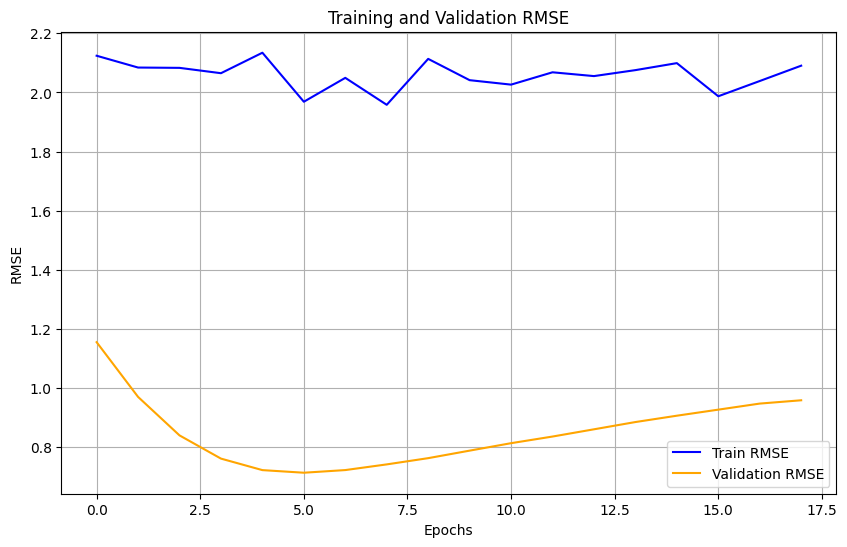

[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[128, 64, 32], model__lr=1e-06, model__optimizer_name=AdamW; total time=   0.8s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


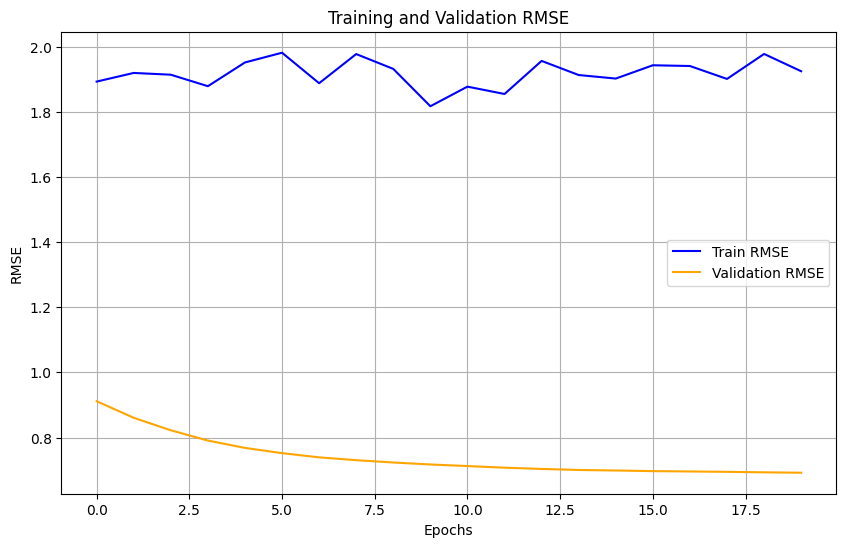

[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[128, 64, 32], model__lr=1e-06, model__optimizer_name=AdamW; total time=   0.7s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


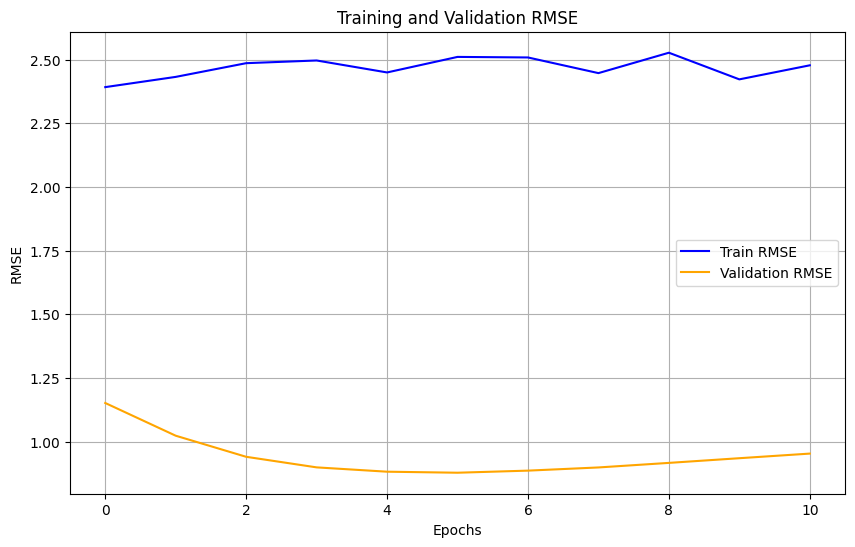

[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[128, 64, 32], model__lr=1e-06, model__optimizer_name=AdamW; total time=   1.1s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


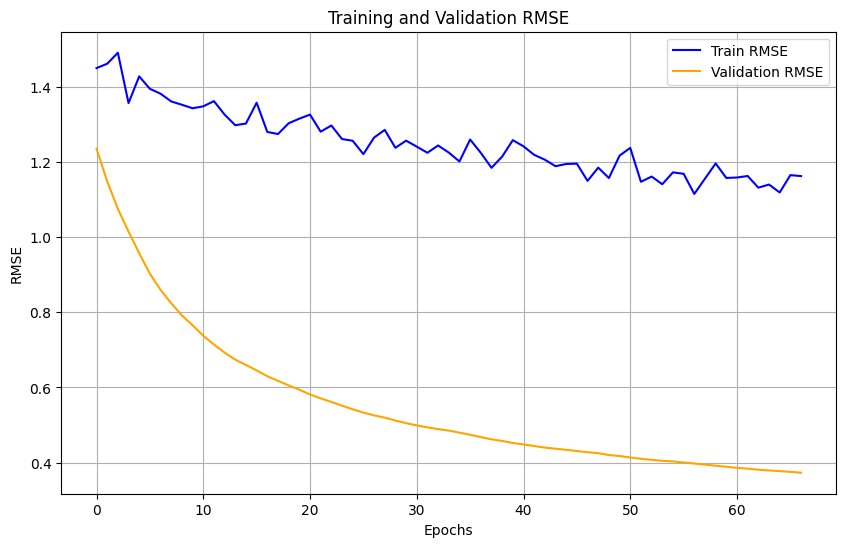

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=0.0001, model__optimizer_name=AdamW; total time=   2.7s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


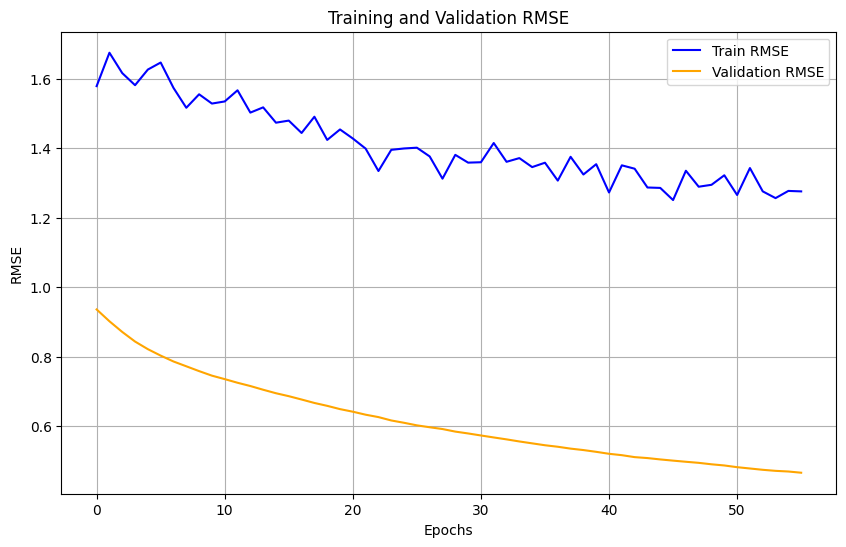

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=0.0001, model__optimizer_name=AdamW; total time=   2.0s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


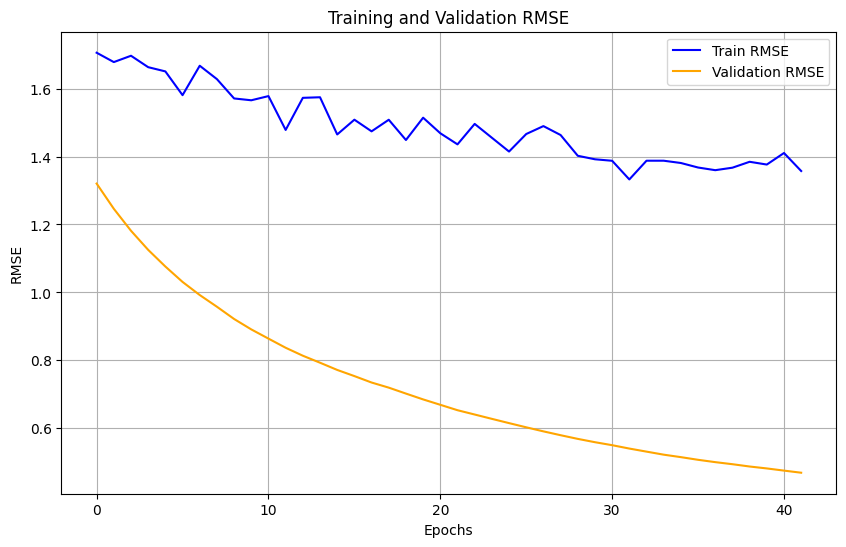

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=0.0001, model__optimizer_name=AdamW; total time=   1.1s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


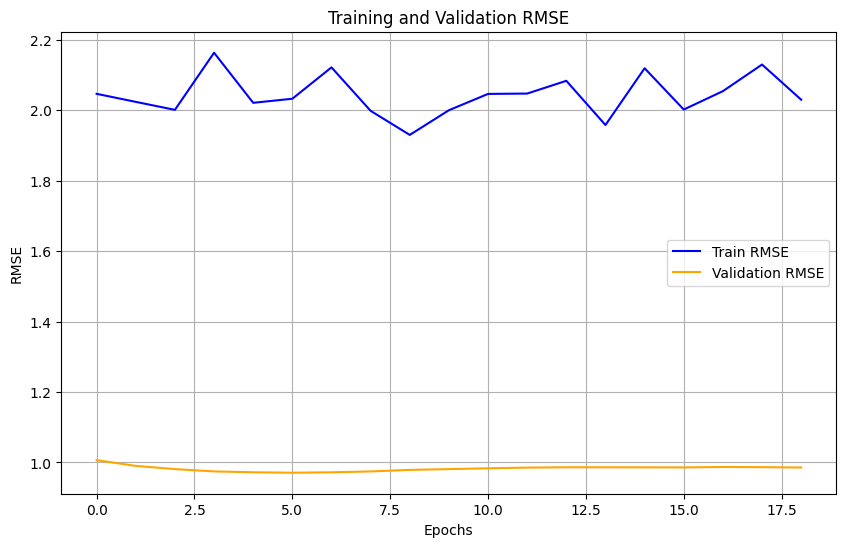

[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[64, 32], model__lr=1e-05, model__optimizer_name=Adam; total time=   0.9s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


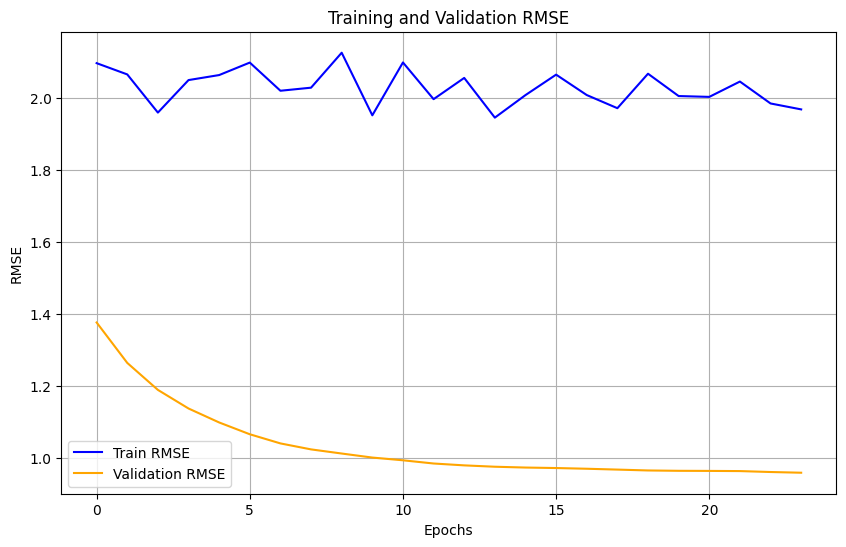

[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[64, 32], model__lr=1e-05, model__optimizer_name=Adam; total time=   1.0s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


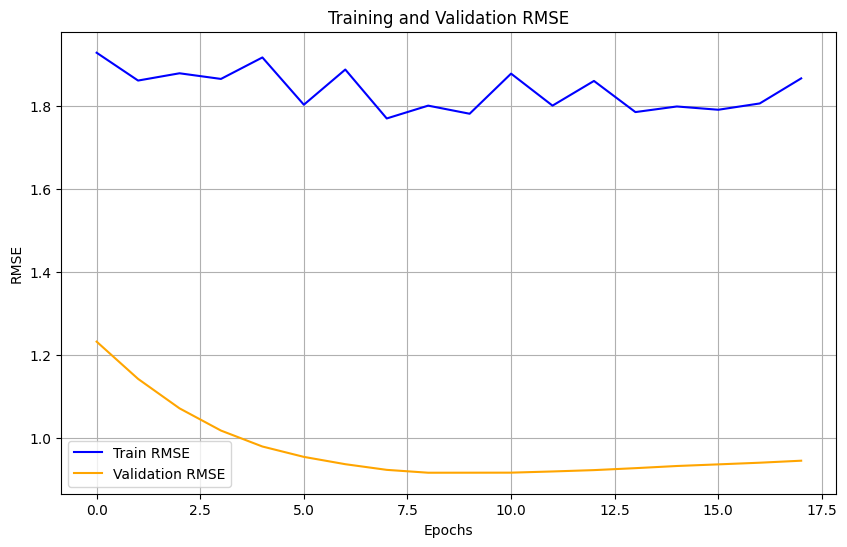

[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[64, 32], model__lr=1e-05, model__optimizer_name=Adam; total time=   0.7s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


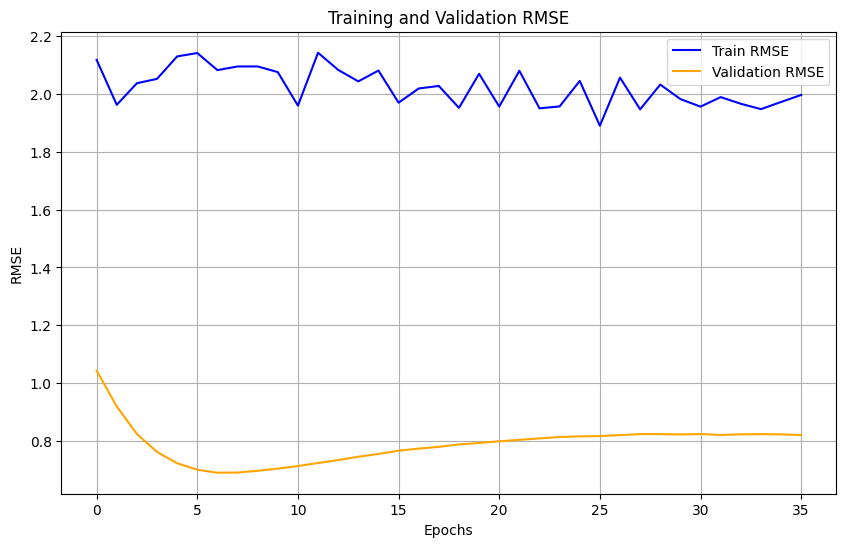

C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[128, 64, 32], model__lr=0.0001, model__optimizer_name=Adam; total time=   1.4s


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


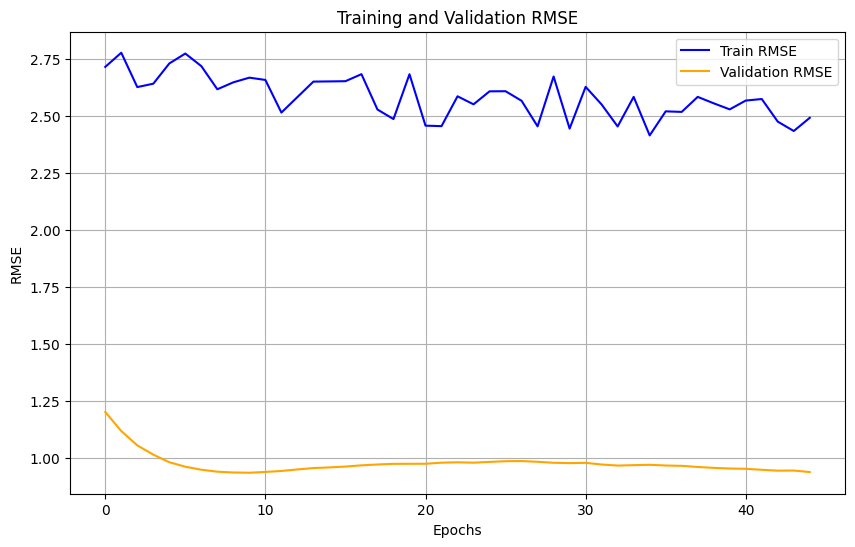

C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[128, 64, 32], model__lr=0.0001, model__optimizer_name=Adam; total time=   1.8s


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


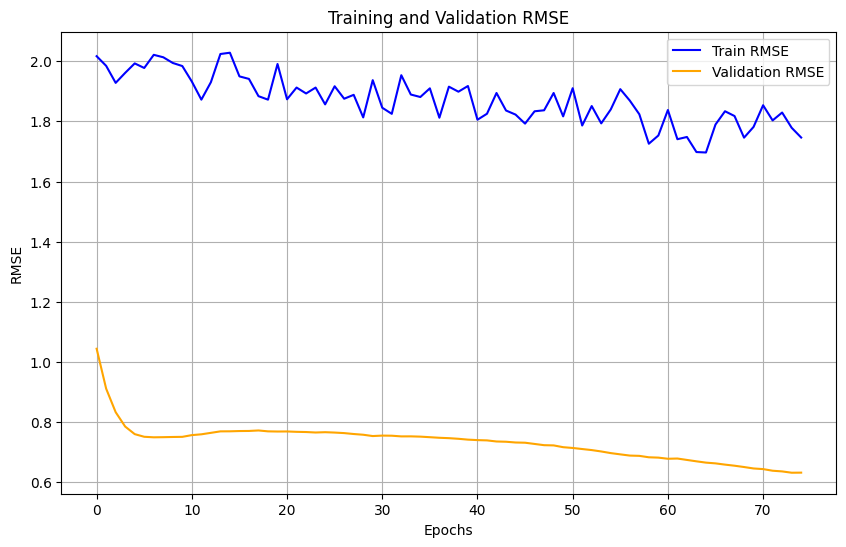

[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[128, 64, 32], model__lr=0.0001, model__optimizer_name=Adam; total time=   3.4s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


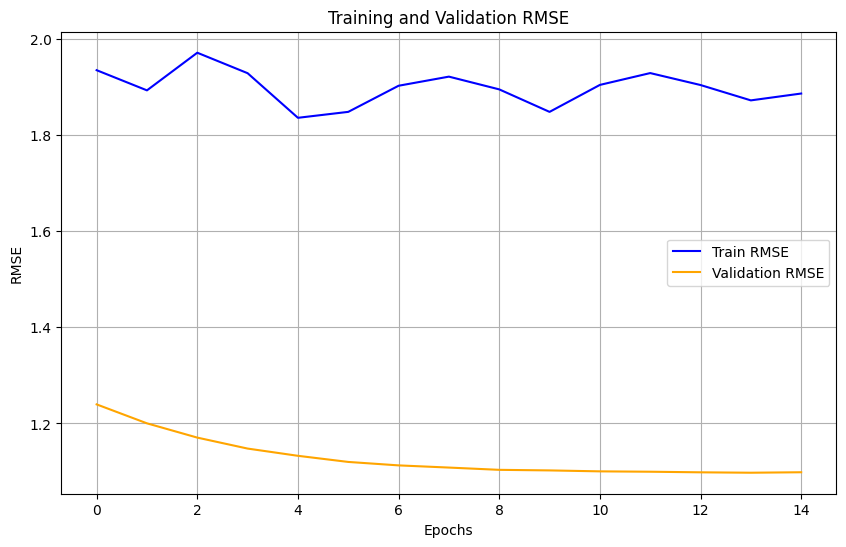

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=1e-06, model__optimizer_name=Adam; total time=   0.8s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


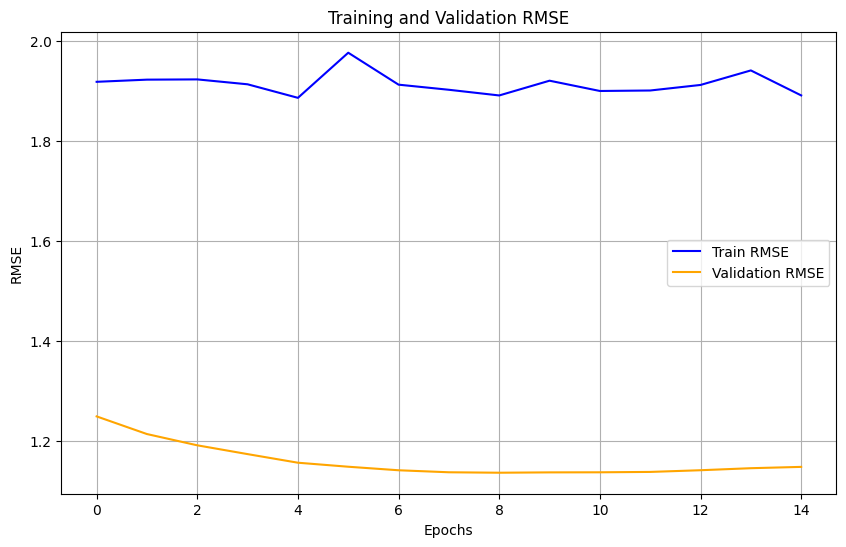

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=1e-06, model__optimizer_name=Adam; total time=   0.7s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


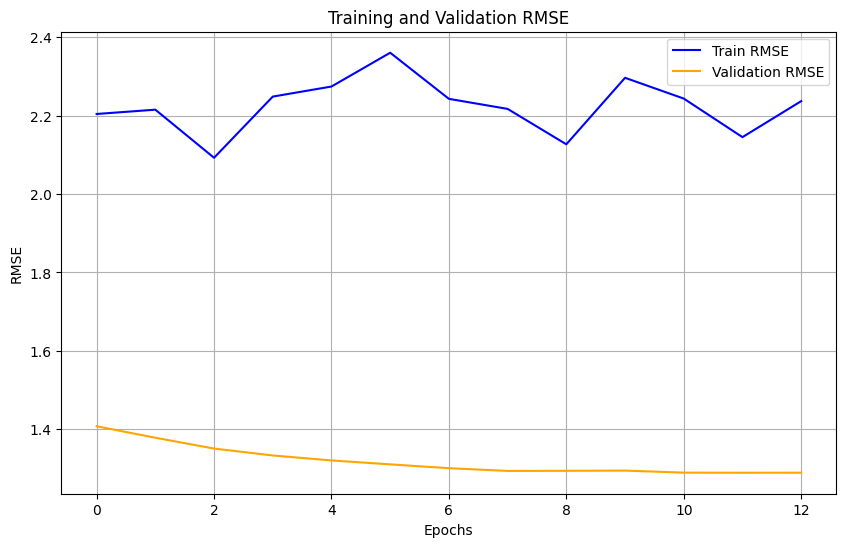

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=1e-06, model__optimizer_name=Adam; total time=   0.5s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


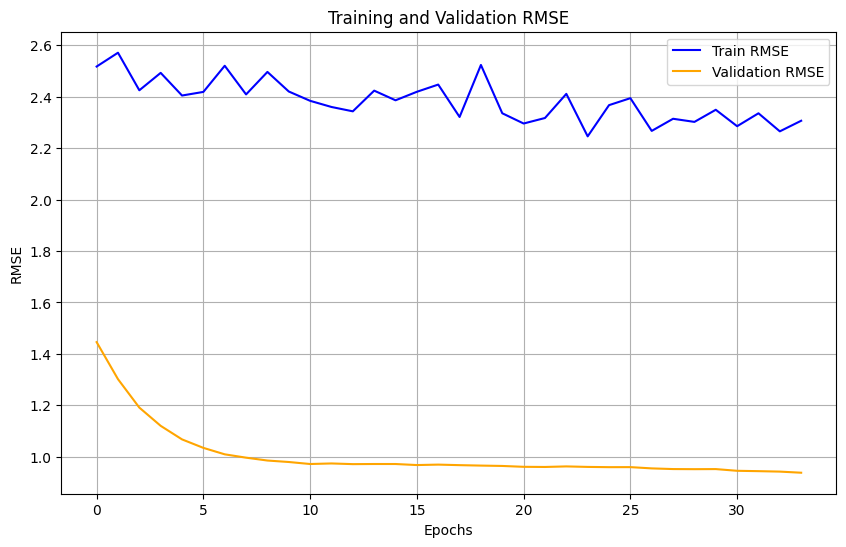

C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[128, 64, 32], model__lr=0.0001, model__optimizer_name=AdamW; total time=   1.1s


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


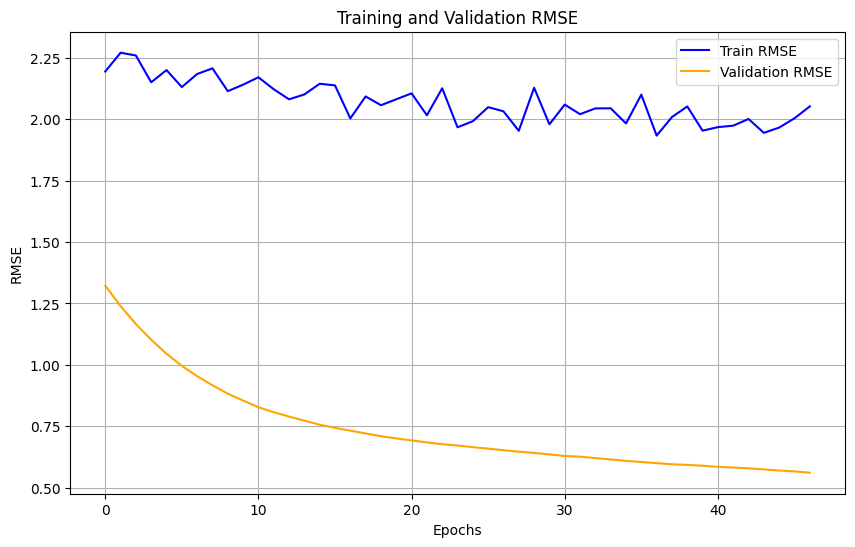

[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[128, 64, 32], model__lr=0.0001, model__optimizer_name=AdamW; total time=   2.5s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


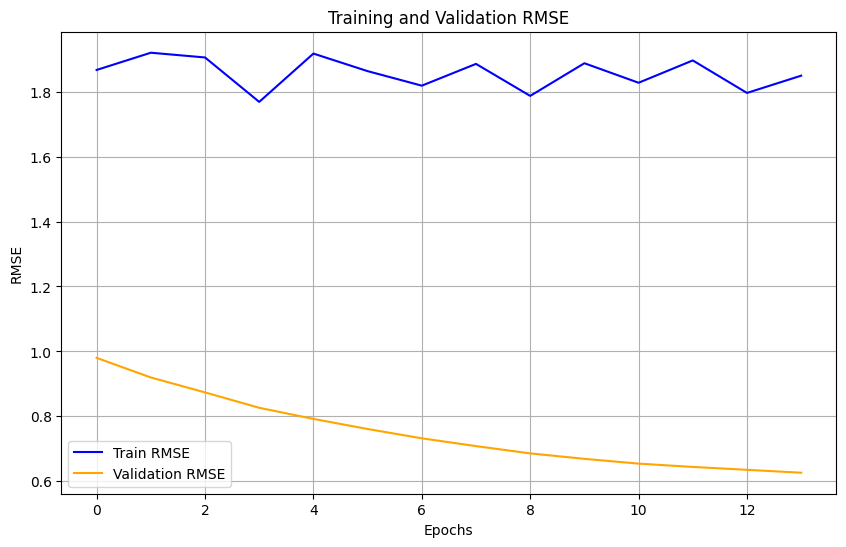

[CV] END model__batch_size=1800, model__dropout_rate=0.5, model__hidden_layers=[128, 64, 32], model__lr=0.0001, model__optimizer_name=AdamW; total time=   0.8s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


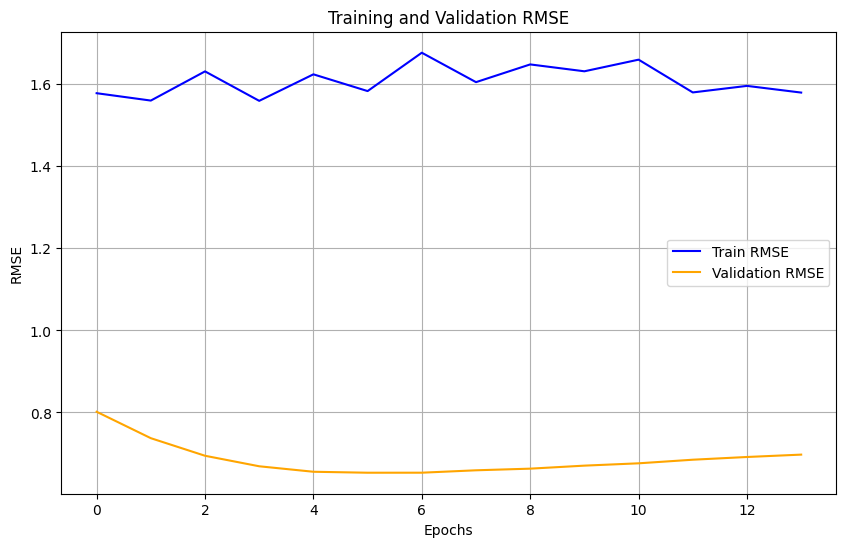

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[128, 64, 32], model__lr=1e-05, model__optimizer_name=AdamW; total time=   0.4s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


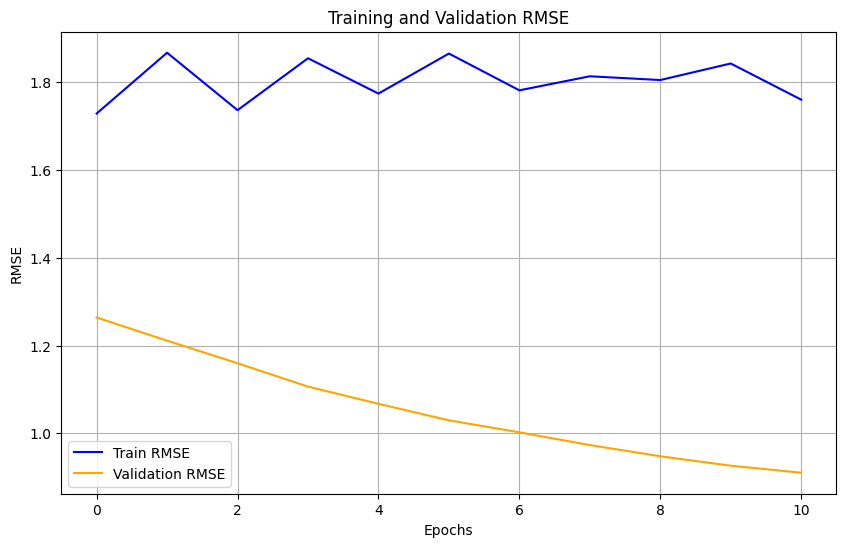

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[128, 64, 32], model__lr=1e-05, model__optimizer_name=AdamW; total time=   0.9s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


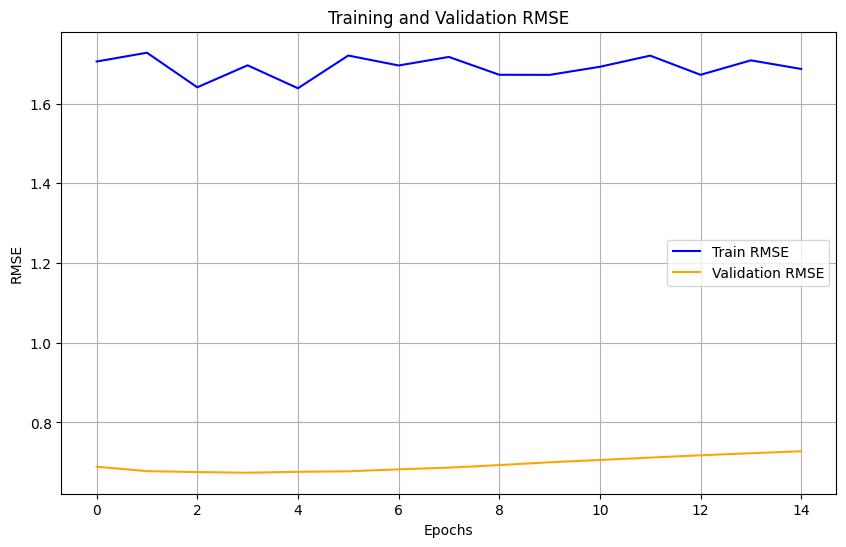

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[128, 64, 32], model__lr=1e-05, model__optimizer_name=AdamW; total time=   1.1s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


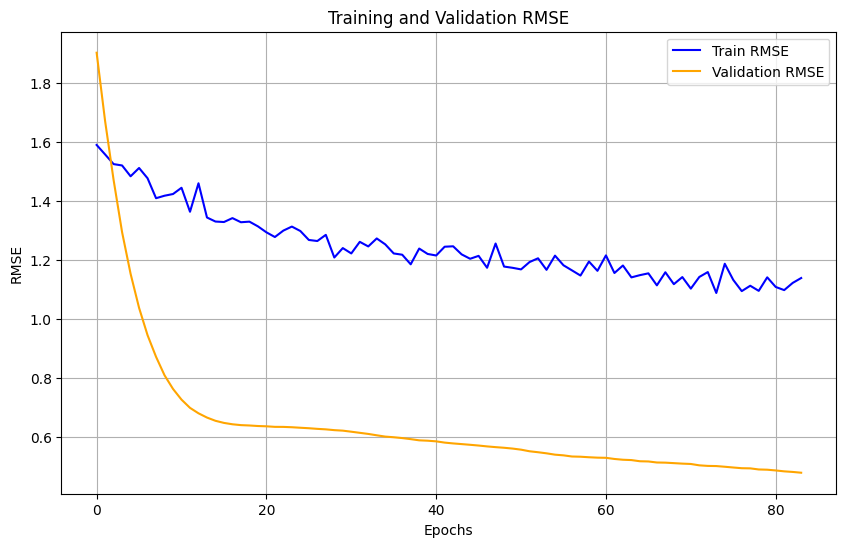

C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=0.0001, model__optimizer_name=Adam; total time=   2.6s


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


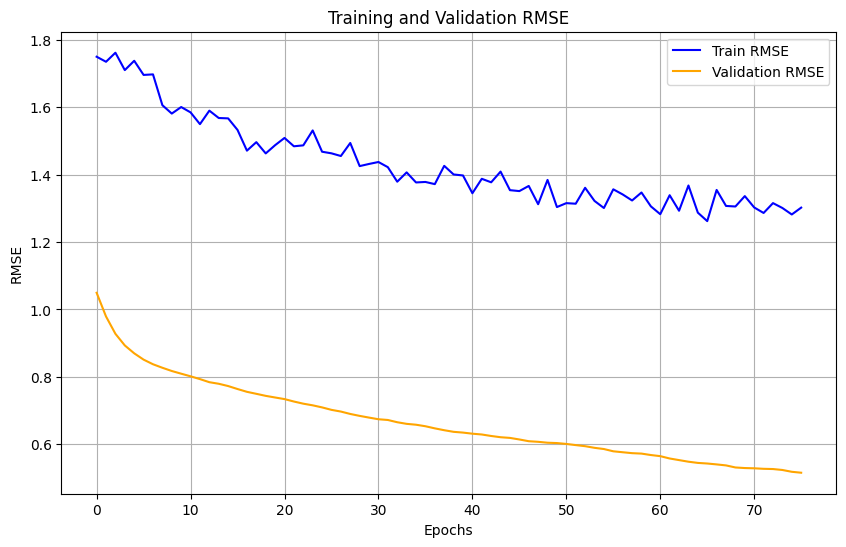

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=0.0001, model__optimizer_name=Adam; total time=   1.7s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


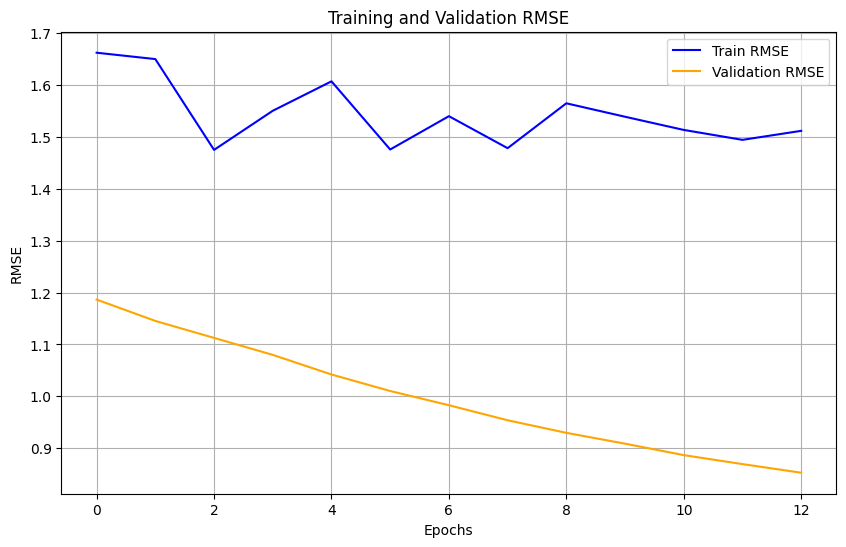

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=0.0001, model__optimizer_name=Adam; total time=   0.6s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


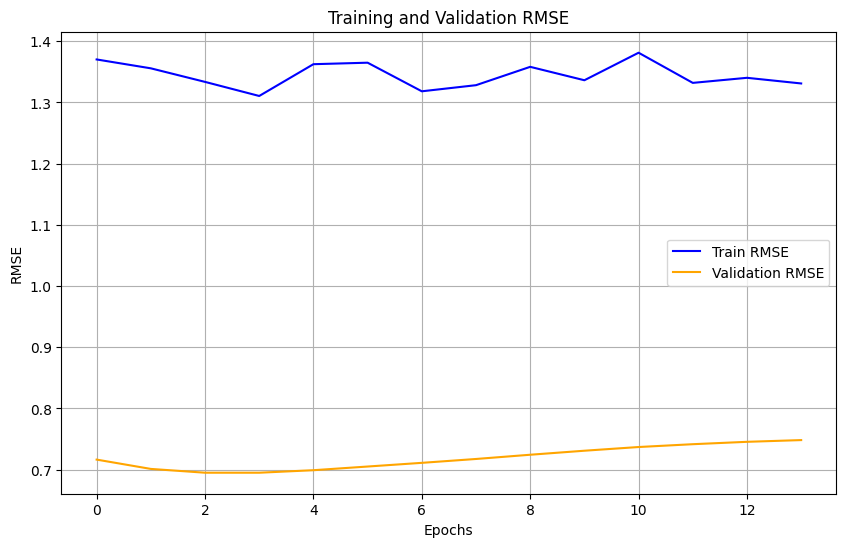

[CV] END model__batch_size=1800, model__dropout_rate=0.3, model__hidden_layers=[128, 64, 32], model__lr=1e-05, model__optimizer_name=Adam; total time=   1.0s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


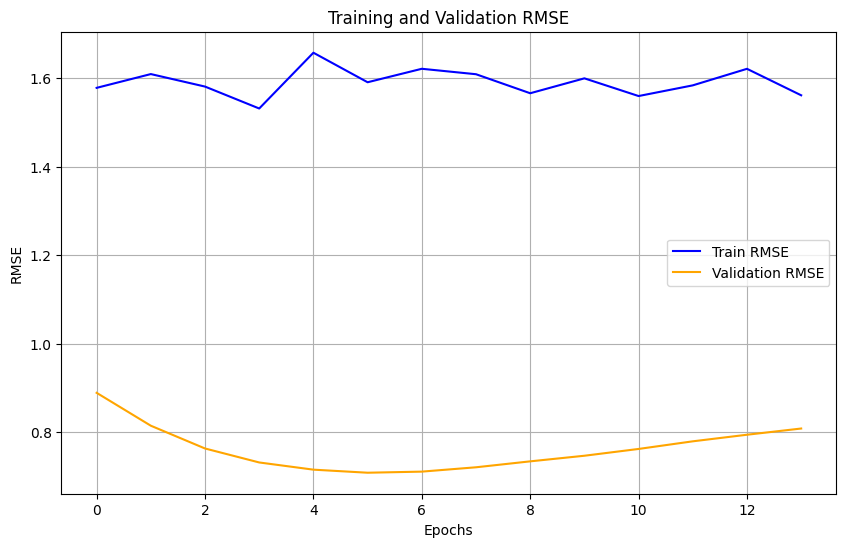

[CV] END model__batch_size=1800, model__dropout_rate=0.3, model__hidden_layers=[128, 64, 32], model__lr=1e-05, model__optimizer_name=Adam; total time=   0.7s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


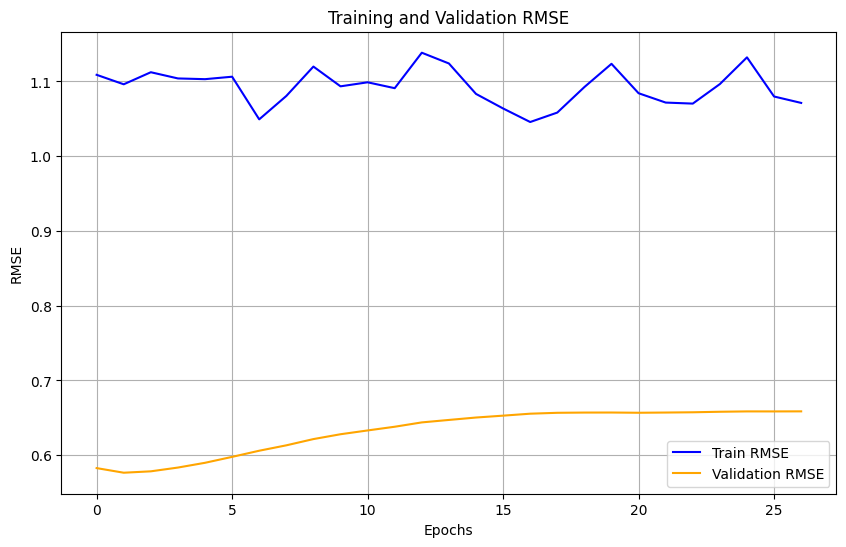

C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV] END model__batch_size=1800, model__dropout_rate=0.3, model__hidden_layers=[128, 64, 32], model__lr=1e-05, model__optimizer_name=Adam; total time=   1.1s


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


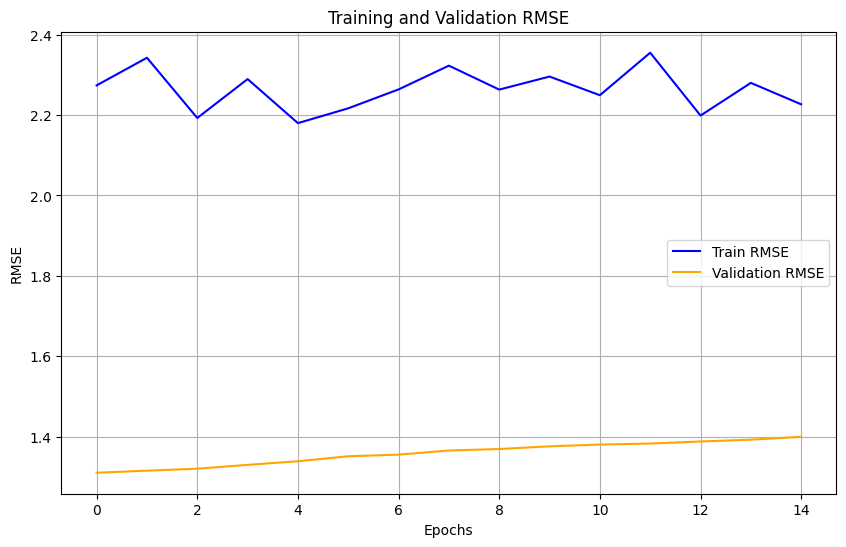

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=1e-06, model__optimizer_name=AdamW; total time=   1.2s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


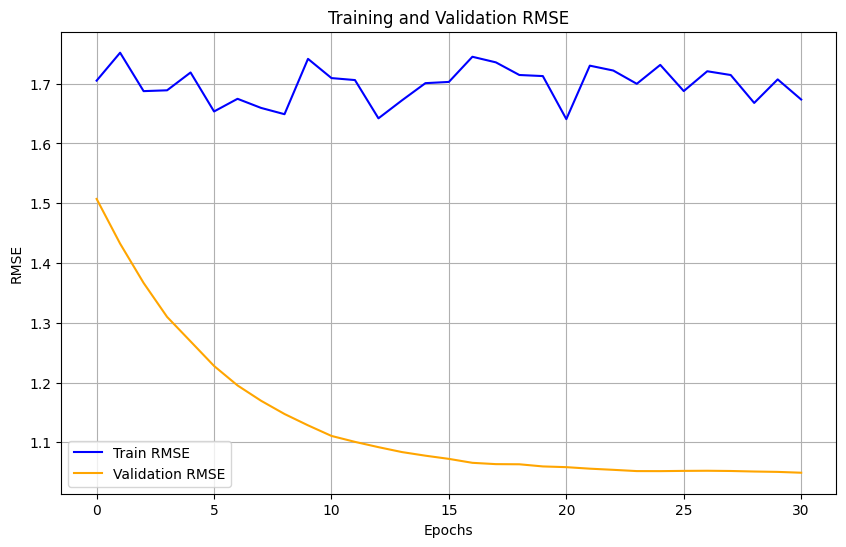

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=1e-06, model__optimizer_name=AdamW; total time=   1.2s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


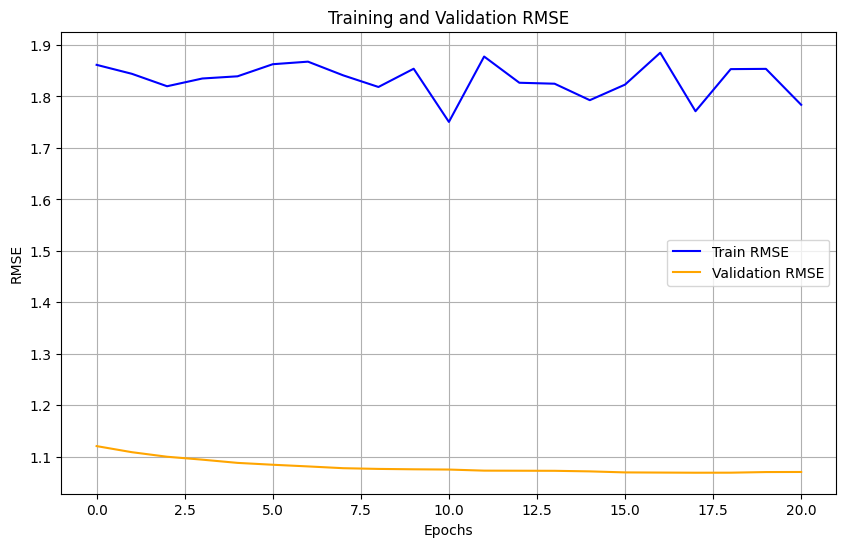

[CV] END model__batch_size=1800, model__dropout_rate=0.4, model__hidden_layers=[64, 32], model__lr=1e-06, model__optimizer_name=AdamW; total time=   0.5s


C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

⏹️ Early stopping triggered


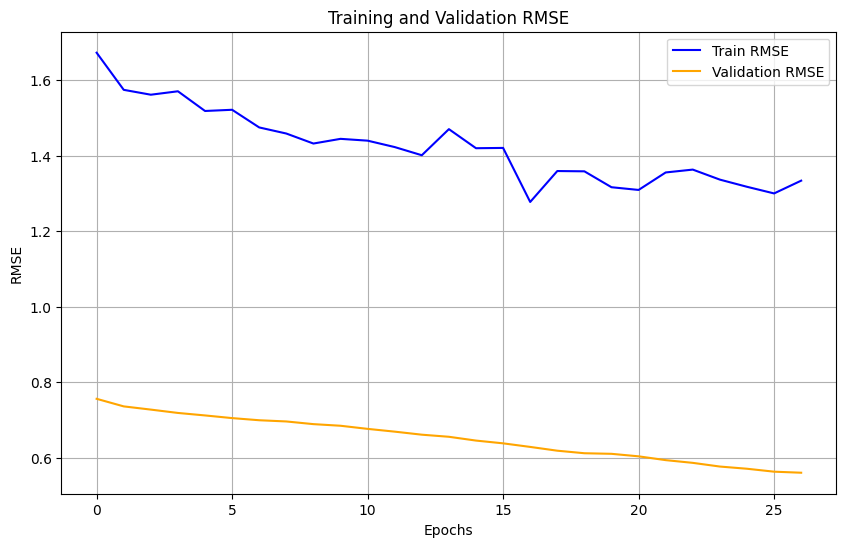

In [186]:
random_search_torch = RandomizedSearchCV(
    estimator=torch_pipe,
    param_distributions=param_distributions_torch,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=1,
    random_state=42
)

# Обучаем
start_time = time.time()
random_search_torch.fit(X_train, y_train)
train_time_torch = time.time() - start_time

In [187]:
# Предсказания и RMSE
y_pred_torch = random_search_torch.best_estimator_.predict(X_valid)
valid_rmse_torch = np.sqrt(mean_squared_error(y_valid, y_pred_torch))
best_params_torch = random_search_torch.best_params_
model_torch = random_search_torch.best_estimator_

C:\anaconda\envs\practicum\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


## Результаты

### Выбор лучшей модели

In [188]:
# Собираем данные в список словарей
results = [
    {
        'model': 'Ridge',
        'rmse': valid_rmse,
        'train_time_sec': train_time,
        'best_params': best_params,
        'fitted_model': model
    },
    {
        'model': 'RandomForest',
        'rmse': valid_rmse_rf,
        'train_time_sec': train_time_rf,
        'best_params': best_params_rf,
        'fitted_model': model_rf
    },
    {
        'model': 'SVR',
        'rmse': valid_rmse_svr,
        'train_time_sec': train_time_svr,
        'best_params': best_params_svr,
        'fitted_model': model_svr
    },
    {
        'model': 'KNN',
        'rmse': valid_rmse_knn,
        'train_time_sec': train_time_knn,
        'best_params': best_params_knn,
        'fitted_model': model_knn
    },
    {
        'model': 'Lasso',
        'rmse': valid_rmse_lasso,
        'train_time_sec': train_time_lasso,
        'best_params': best_params_lasso,
        'fitted_model': model_lasso
    },
    {
        'model': 'LightGBM',
        'rmse': valid_rmse_lgbm,
        'train_time_sec': train_time_lgbm,
        'best_params': best_params_lgbm,
        'fitted_model': model_lgbm
    },
    {
        'model': 'TorchRegressor',
        'rmse': valid_rmse_torch,
        'train_time_sec': train_time_torch,
        'best_params': best_params_torch,
        'fitted_model': model_torch
}
]

In [189]:
# Преобразуем в DataFrame (без fitted_model для отображения)
results_df = pd.DataFrame([{k: v for k, v in d.items() if k != 'fitted_model'} for d in results])

In [190]:
# Выводим таблицу
print("📊 Сравнение моделей:")
display(results_df.sort_values(by='rmse'))

📊 Сравнение моделей:


model      rmse  train_time_sec  \
1    RandomForest  0.245826     1307.461878   
4           Lasso  0.246124        1.890078   
5        LightGBM  0.247251      195.381487   
2             SVR  0.247521     3171.428725   
3             KNN  0.263019       10.828966   
0           Ridge  0.326776        1.438537   
6  TorchRegressor  0.810787       41.809892   

                                         best_params  
1  {'model__n_estimators': 200, 'model__min_sampl...  
4                             {'model__alpha': 0.01}  
5  {'model__num_leaves': 31, 'model__n_estimators...  
2  {'model__kernel': 'rbf', 'model__gamma': 'scal...  
3  {'model__weights': 'distance', 'model__n_neigh...  
0                             {'model__alpha': 10.0}  
6  {'model__optimizer_name': 'AdamW', 'model__lr'...

In [191]:
# Определим лучшую модель по минимальному RMSE
best_result = min(results, key=lambda x: x['rmse'])
best_model_name = best_result['model']
best_model_object = best_result['fitted_model']

In [192]:
print(f"\n🏆 Лучшая модель: {best_model_name}")
print(f"📉 Минимальный RMSE: {best_result['rmse']:.4f}")


🏆 Лучшая модель: RandomForest
📉 Минимальный RMSE: 0.2458


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Все-таки основную ставку в этом проекте я бы делал на нейронку. Если лес показал лучшие метрики, возможно с нейронной сетью мы просто недоработали.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Попробовал доработать нейросетку.

</div>

In [193]:
# Предсказания: если модель — это Pipeline, достаём predict как обычно
try:
    y_pred = best_model_object.predict(X_valid)
except Exception as e:
    print(f"⚠️ Ошибка при предсказании: {e}")
    y_pred = np.zeros_like(y_valid)  # запасной вариант, чтобы не падало

# Оценка RMSE и R²
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred))
r2_valid = r2_score(y_valid, y_pred)

print(f"📉 RMSE на тесте: {rmse_valid:.4f}")
print(f"📈 R² на тесте: {r2_valid:.4f}")


📉 RMSE на тесте: 0.2458
📈 R² на тесте: 0.0504


In [194]:
# Вывод результатов тестирования
print("Final Valid Evaluation")
print("RMSE (Valid):", rmse_valid)
print("R2 (Valid):", r2_valid)

Final Valid Evaluation
RMSE (Valid): 0.24582624518956636
R2 (Valid): 0.05040120580370311


### Анализ остатков

In [195]:
# Создаю функцию для анализа остатков с помощью графиков
def res_graph(y_valid, y_pred):
    residuals = y_valid - y_pred
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # График остатков
    axes[0].scatter(y_pred, residuals)
    axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
    axes[0].set_xlabel('Прогнозные значения')
    axes[0].set_ylabel('Остатки')
    axes[0].set_title('Остатки и Прогнозные значения')
    
    # Гистограмма остатков
    axes[1].hist(residuals, bins=20, edgecolor='black')
    axes[1].set_xlabel('Остатки')
    axes[1].set_ylabel('Частота')
    axes[1].set_title('Гистограмма остатков')
    mean_residual = np.mean(residuals)
    axes[1].axvline(x=mean_residual, color='blue', linestyle='-', linewidth=2, label='Среднее значение остатков')
    axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Нулевое значение')
    axes[1].legend()
    plt.tight_layout()
    plt.show()

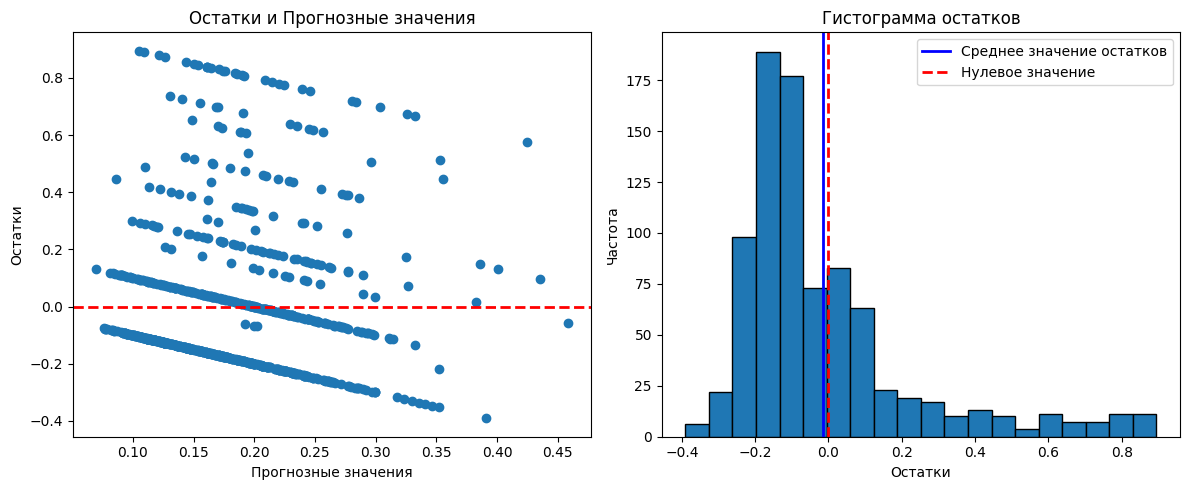

In [196]:
res_graph(y_test, y_pred)

## Тестирование работы лучшей модели

📦 Старт: извлекаем эмбеддинги ResNet-50 для 100 изображений...


🔄 Извлечение эмбеддингов:   0%|          | 0/2 [00:00<?, ?it/s]

✅ Готово! 100 изображений обработано за 2.4 сек.

🔍 Обрабатывается запрос: A cyclist riding down a dirt trail.
🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/1 [00:00<?, ?it/s]

C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\anaconda\envs\practicum\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🖼️ Лучшее изображение: 3396275223_ee080df8b5.jpg
🎯 Предсказанный score: 0.3263


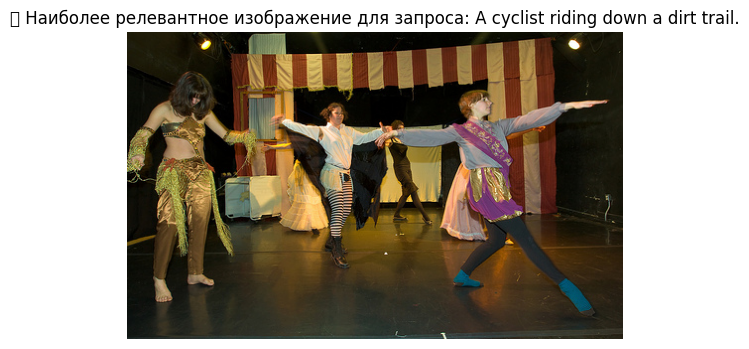


🔍 Обрабатывается запрос: A hiker is standing in front of a cliff.
🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/1 [00:00<?, ?it/s]

C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\anaconda\envs\practicum\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🖼️ Лучшее изображение: 3396275223_ee080df8b5.jpg
🎯 Предсказанный score: 0.3302


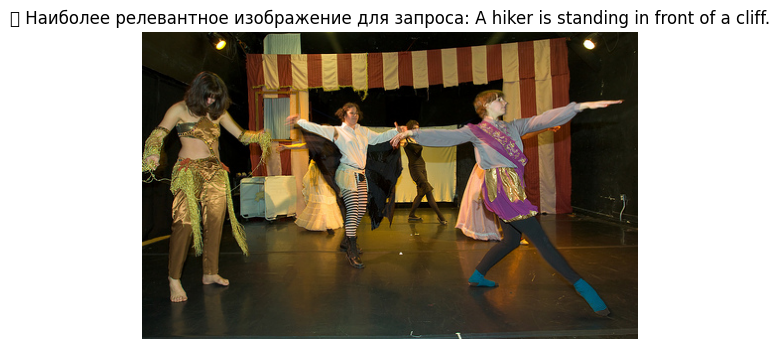


🔍 Обрабатывается запрос: A woman is sitting on a rocky mountain top.
🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/1 [00:00<?, ?it/s]

C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\anaconda\envs\practicum\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🖼️ Лучшее изображение: 3396275223_ee080df8b5.jpg
🎯 Предсказанный score: 0.3114


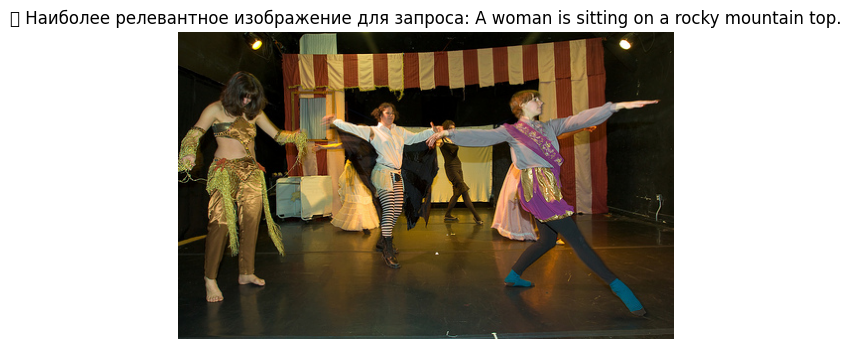


🔍 Обрабатывается запрос: A train passing through snowy mountains.
🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/1 [00:00<?, ?it/s]

C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\anaconda\envs\practicum\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🖼️ Лучшее изображение: 3396275223_ee080df8b5.jpg
🎯 Предсказанный score: 0.3450


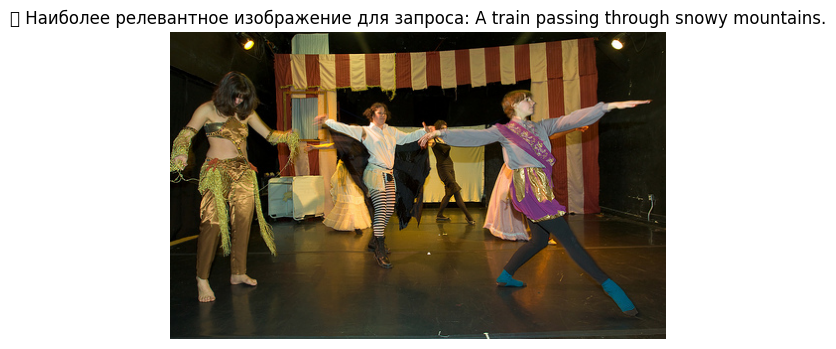


🔍 Обрабатывается запрос: A skier jumping off a slope.
🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/1 [00:00<?, ?it/s]

C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\anaconda\envs\practicum\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🖼️ Лучшее изображение: 3396275223_ee080df8b5.jpg
🎯 Предсказанный score: 0.3533


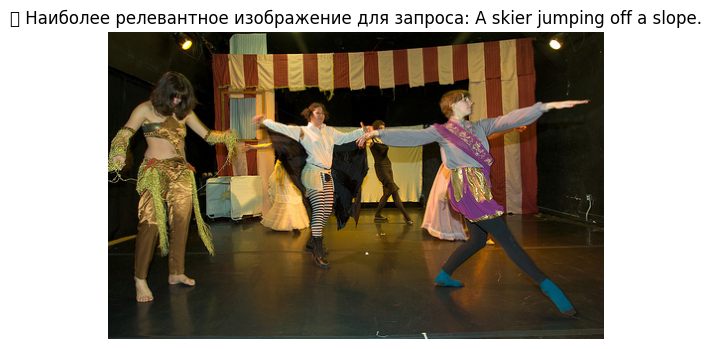


🔍 Обрабатывается запрос: A dog is running along the beach.
🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/1 [00:00<?, ?it/s]

🖼️ Лучшее изображение: 3396275223_ee080df8b5.jpg
🎯 Предсказанный score: 0.3410


C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\anaconda\envs\practicum\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


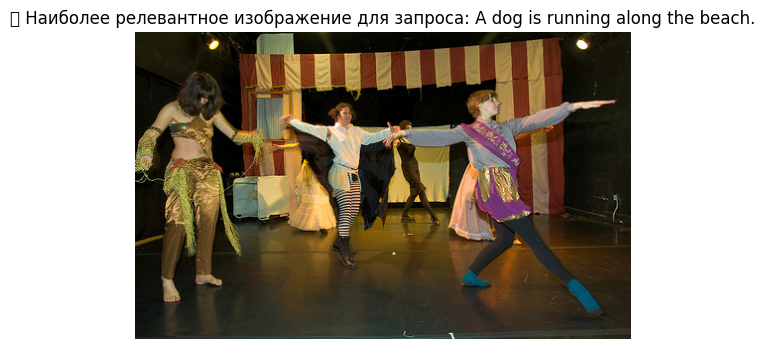


🔍 Обрабатывается запрос: A man is crossing a mountain pass on a metal bridge.
🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/1 [00:00<?, ?it/s]

C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\anaconda\envs\practicum\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🖼️ Лучшее изображение: 3514297698_0512623955.jpg
🎯 Предсказанный score: 0.3192


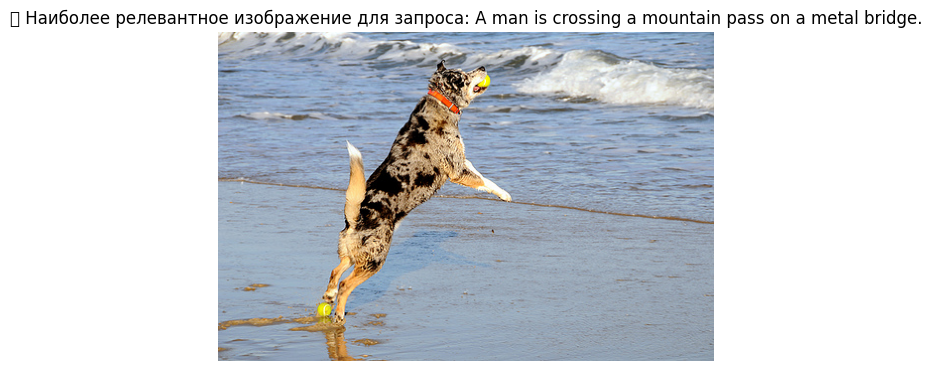


🔍 Обрабатывается запрос: A car driving on a winding road through the hills.
🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/1 [00:00<?, ?it/s]

C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\anaconda\envs\practicum\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🖼️ Лучшее изображение: 3514297698_0512623955.jpg
🎯 Предсказанный score: 0.2801


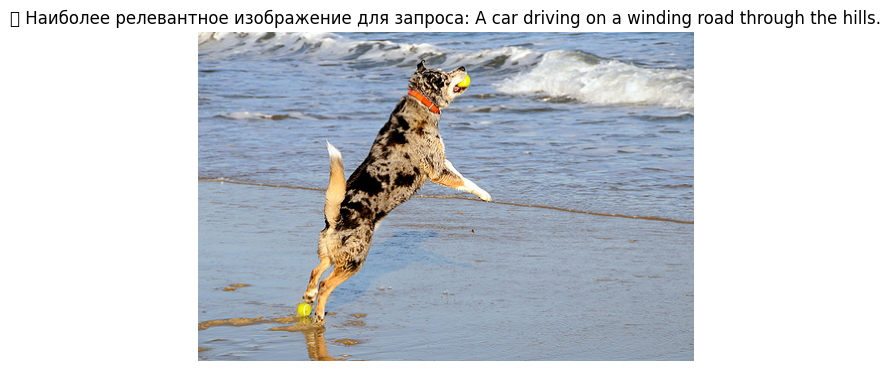


🔍 Обрабатывается запрос: A child playing in a park on a sunny day.
🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/1 [00:00<?, ?it/s]

C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\anaconda\envs\practicum\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🖼️ Лучшее изображение: 3396275223_ee080df8b5.jpg
🎯 Предсказанный score: 0.3227


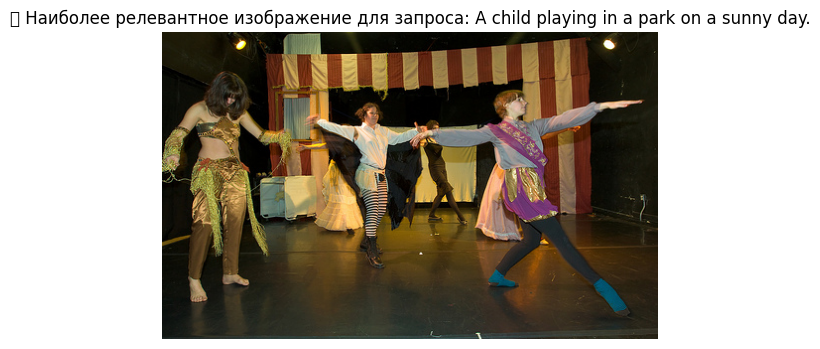


🔍 Обрабатывается запрос: A group of people walking through a dense forest.
🔌 Используется устройство: cuda


🚀 Обработка BERT батчей:   0%|          | 0/1 [00:00<?, ?it/s]

C:\anaconda\envs\practicum\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\anaconda\envs\practicum\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🖼️ Лучшее изображение: 3396275223_ee080df8b5.jpg
🎯 Предсказанный score: 0.2701


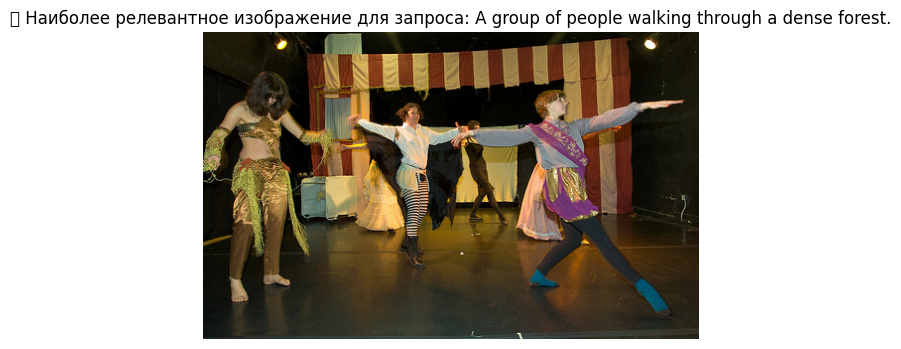

In [197]:
def search_images_for_queries(queries, model, df_with_image_embeddings, image_dir, num_images=10):
    """
    Для списка запросов ищет наиболее релевантные изображения, сравнивая эмбеддинги текста и изображений.
    """
    # 1. Получаем эмбеддинги изображений для 100 уникальных тестовых изображений
    img_feat_cols = [col for col in df_with_image_embeddings.columns if col.startswith('img_feat_')]
    image_vectors = df_with_image_embeddings[img_feat_cols].values  # (100, 2048)

    # Для каждого запроса
    for query in queries:
        print(f"\n🔍 Обрабатывается запрос: {query}")
        
        # 2. Получаем эмбеддинг текста через BERT
        text_embedding_df = get_bert_text_embeddings(query, batch_size=1)
        text_vector = text_embedding_df.drop(columns='index').values[0].reshape(1, -1)  # (1, 768)

        # 3. Дублируем текстовый вектор под каждую картинку
        text_matrix = np.tile(text_vector, (image_vectors.shape[0], 1))  # (100, 768)

        # 4. Объединяем текст + картинка
        X_test = np.hstack([text_matrix, image_vectors])  # (100, 768 + 2048)

        # 5. Получаем предсказания модели
        preds = model.predict(X_test)

        # 6. Находим индекс изображения с наибольшим сходством
        idx = preds.argmax()
        best_image_name = df_with_image_embeddings.iloc[idx]['image']
        best_score = preds[idx]

        # 7. Путь и визуализация
        img_path = os.path.join(image_dir, best_image_name)
        print(f"🖼️ Лучшее изображение: {best_image_name}")
        print(f"🎯 Предсказанный score: {best_score:.4f}")

        # Визуализация
        plt.imshow(Image.open(img_path))
        plt.axis('off')
        plt.title(f"🔍 Наиболее релевантное изображение для запроса: {query}")
        plt.show()


# Генерация случайных запросов для теста (например, 10 случайных запросов)
test_queries = [
    "A man is crossing a mountain pass on a metal bridge.",
    "A hiker is standing in front of a cliff.",
    "A group of people walking through a dense forest.",
    "A woman is sitting on a rocky mountain top.",
    "A dog is running along the beach.",
    "A train passing through snowy mountains.",
    "A child playing in a park on a sunny day.",
    "A cyclist riding down a dirt trail.",
    "A car driving on a winding road through the hills.",
    "A skier jumping off a slope."
]

# 1. Уникальные имена изображений из тестового датафрейма
test_image_names = test['image'].unique()

# 2. Извлекаем эмбеддинги изображений через ResNet-50
df_img_emb_test = extract_embeddings_resnet50_safe(
    image_names=test_image_names,
    image_dir='test_images',
    batch_size=64
)

# 3. Объединяем эмбеддинги с исходным test по колонке 'image'
df_test_with_embeddings = test.merge(df_img_emb_test, on='image', how='left')

# 4. Тестирование модели на 10 случайных запросах
search_images_for_queries(
    queries=random.sample(test_queries, 10),
    model=best_model_object,
    df_with_image_embeddings=df_test_with_embeddings,
    image_dir='test_images',
    num_images=10
)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Я не до конца понял логику последних двух ячеек.  Пожалуйста доработай их
    
 - нужно провести тестирование модели на 10 случайных запросах.  Пока я вижу только одно предсказание
 - во вторых, у нас всего 100 уникальных тестовых изображений.  Зачем же ты загоняешь полученные эмбединги в датафрейм df_test_with_embeddings и заставляешь модель работать с 500 парами вместо 100?
    
-------------------
    
Давай я опишу логику тестирования.
    
 - заранее получаем матрицу (лучше матрицу) эмбеддингов для 100 тестовых изображений
 - внутри функции для поиска векторизуем запрос, размножаем его (по количеству изображений) и конкатенируем матрицы векторов изображений и описаний
 - делаем предсказание с помощью модели, выбираем изображение для которых получилось самое большое сходство
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Переделал тестирование.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, ты прав, к сожалению работают они не очень. Думаю что основная причина - неподходящая модель. 

    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert (лучший результат дает модель  `all-MiniLM-L6-v2`)
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
ОК

</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

## Выводы по проекту

1. Лучшей моделью оказалась 

In [198]:
print(f"\n🏆 Лучшая модель: {best_model_name}")
print(f"📉 Минимальный RMSE: {best_result['rmse']:.4f}")
print(f"📉 RMSE на тесте: {rmse_test:.4f}")
print(f"📈 R² на тесте: {r2_test:.4f}")


🏆 Лучшая модель: RandomForest
📉 Минимальный RMSE: 0.2458
📉 RMSE на тесте: 0.2458
📈 R² на тесте: 0.0504


2. RMSE высокая и R2 низкая - модель получилась слабая

3. Об этом говорит и рсапределение остатков - в них видны закономерности

4. Пути улучшения модели - значительно увеличить тренировочную выборку x10, x100. Может имеет смысл применить и дообучить трансформер.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.
    
Очень крутое оформление, грамотный код.
    
Осмелюсь предполжить, что ты активно использовал AI-помощника для написания кода, но хорошо видно, что ты не просто занимаешься "вайб-кодингом", а четко ставишь задачи и хорошо понимаешь что за код написан и как его применить. Т.е.  AI помогает тебе повысить планку, но не заменяет тебя.    
 
    
Единственный красный комментарий касается логики тестирования. Но думаю тут ты быстро все исправишь.
Также (при наличии времени) можно попробовать "допилить" твое решение до уровня, чтобы модель начала проявлять признаки разумности.  Рекомендации: только экспертные оценки +  resnet18 +   `all-MiniLM-L6-v2` + поработать с нейронкой. 
    
Желтые комментарии на твое усмотрение. Но если не получится добить собственное решение,  попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Спасибо! Да, я активно использую chatGPT. Очень ускоряет работу и дает возможноть поэксперементировать с разными подходами. Когда не могу понять код прошу объяснить его несколько раз и пока не пойму что и как дальше не двигаюсь. Даже при этом последние проекты не кажутся легкими - в основном потому, что делаешь по каждой теме в первый раз.


Я думаю после курса попробовать начать свое дело.<br>
Можешь, пожалуйста, посмотреть как я это вижу и по критиковать? :) <br>
Это будет чем-то вроде бюро по машинного обучения для промышленностию. <br>
Направления - оптимизация технологических процессов, прогнозирования отказов оборудования, виртуальные ассистенты оператора. <br>
Видео аналитика мне пока не очень перспективной кажется - большая конкуренция. <br>
Хочу предлагать услуги по этапам CRISP-DS, делая кастомые решения. <br>
Вижу, что в основном все дорастают до неких low-code систем. Но не уверен, что это то, что нужно пользователю. <br>
Возможно лучше интегрировать свой сервис или on-premise модель в существующую систему.
</div>